In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
from statannot import add_stat_annotation
sns.set(font_scale=1.3)

#seaborn Gr-Bk-Rd palette
pal = sns.diverging_palette(127.7, 12.2, l=53.4, n=255, center="dark")

In [2]:
#CLASS:Type	Toma	DMSO	Toma	DMSO	Toma	DMSO
#CLASS:Day	60	60	36	36	54	54

---
### preprocess

In [3]:
d1 = pd.read_excel('./1_DMSO,Toma day 53_data2.xlsx')
d2 = pd.read_excel('./2&3 DMSO, Toma day 54, 36_data2.xlsx')

d1 = d1[['Gene_Symbol', 'D60-2W-Toma.mean', 'D60-2W-DMSO.mean']]
d2 = d2[['Gene_Symbol', 'P36-24h-Toma.mean', 'P36-24h-DMSO.mean', 'Day54-Toma.mean', 'Day54-DMSO.mean']]

m1 = pd.merge(d1,d2,on='Gene_Symbol')

m1.to_csv('./merge.txt', sep='\t', index=False)

---
### heatmap

In [4]:
df2 = pd.read_csv('./merge.txt', sep='\t', comment='#', index_col='Gene_Symbol')
df = pd.read_csv('./heatmap_siggene.csv', index_col='Symbols')

df = pd.merge(df, df2, left_index=True, right_index=True).iloc[:,-6:]

df = pd.DataFrame(df, columns = ['D60-2W-Toma.mean','P36-24h-Toma.mean','Day54-Toma.mean','D60-2W-DMSO.mean','P36-24h-DMSO.mean','Day54-DMSO.mean'])

In [5]:
df.head()

,D60-2W-Toma.mean,P36-24h-Toma.mean,Day54-Toma.mean,D60-2W-DMSO.mean,P36-24h-DMSO.mean,Day54-DMSO.mean
ACTB,8.955865,9.266147,8.152794,9.552266,9.467347,10.631902
ACTG2,4.707955,3.752815,2.134228,5.957185,5.183469,7.686371
ADAM12,0.996813,1.361415,0.079253,1.511197,1.679244,2.548703
AMIGO2,1.423658,1.968027,0.430453,2.072799,2.703173,3.251337
ANXA1,4.335801,5.281837,2.725703,4.912228,5.806976,6.883583


In [6]:
toma_mean = df.iloc[:,0:3].T.mean()
dmso_mean = df.iloc[:,3:6].T.mean()

In [7]:
df_h = pd.DataFrame([dmso_mean, toma_mean], index=['DMSO_mean', 'Toma_mean']).T

In [8]:
df_h.head()

,DMSO_mean,Toma_mean
ACTB,9.883838,8.791602
ACTG2,6.275675,3.531666
ADAM12,1.913048,0.812494
AMIGO2,2.675770,1.274046
ANXA1,5.867596,4.114447


---
## TGF-beta Signaling Pathway

In [9]:
tgfbdf_h = pd.DataFrame()

In [10]:
#TGF-beta Signaling Pathway
tgfb = ['AKT1', 'APP', 'ATF2', 'ATF3', 'AXIN1', 'BCAR1', 'BTRC', 'CAV1', 'CCNB2', 'CCND1', 'CDC42', 'CDK1', 'CDKN1A', 'CDKN2B', 'CITED1', 
        'COL1A2', 'COPS5', 'CREBBP', 'CUL1', 'DAB2', 'DCP1A', 'E2F4', 'E2F5', 'EID2', 'EP300', 'ETS1', 'FN1', 'FOS', 'FOSB', 'FOXH1', 'FOXP3', 
        'GRB2', 'HDAC1', 'HGS', 'ITCH', 'ITGA2', 'ITGB1', 'ITGB3', 'ITGB4', 'JUN', 'JUNB', 'JUND', 'KLF10', 'KLF11', 'KLF6', 'LIMK2', 'MAP2K1', 
        'MAP2K2', 'MAP2K3', 'MAP2K4', 'MAP2K6', 'MAP3K7', 'MAP4K1', 'MAPK14', 'MAPK1', 'MAPK3', 'MAPK8', 'MAPK9', 'MEF2A', 'MEF2C', 'MET', 'MMP12', 
        'MMP1', 'MTOR', 'MYC', 'NEDD4L', 'NEDD9', 'NUP153', 'NUP214', 'PAK2', 'PARD6A', 'PDK1', 'PIAS1', 'PIAS2', 'PIK3R1', 'PIK3R2', 'PJA1', 'PML', 
        'PPM1A', 'PRKAR2A', 'PTK2', 'RAC1', 'RAF1', 'RAS', 'RBL1', 'RBL2', 'RBX1', 'RHOA', 'RNF111', 'ROCK1', 'RUNX2', 'S6K', 'SHC1', 'SIK1', 'SIN3A', 
        'SKI', 'SKIL', 'SKP1', 'SMAD2', 'SMAD3', 'SMAD4', 'SMAD7', 'SMURF1', 'SMURF2', 'SNIP1', 'SNW1', 'SOS1', 'SP1', 'SPTBN1', 'SRC', 'STAMBPL1', 
        'STRAP', 'SUMO1', 'TAB1', 'TERT', 'TFDP1', 'TGFB1', 'TGFB1I1', 'TGFBR1', 'TGFBR2', 'TGFBR3', 'TGIF1', 'THBS1', 'TNC', 'TP53', 'TRAF6', 'TRAP1', 
        'UBE2I', 'UCHL5', 'WWP1', 'YAP1', 'ZEB1', 'ZEB2', 'ZFYVE16', 'ZFYVE9']

tgfbdf = df.loc[tgfb]
tgfbdf_h = tgfbdf_h.append(df_h.loc[tgfb])

tgfdf = tgfbdf.dropna().drop_duplicates()

C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  if sys.path[0] == '':
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  del sys.path[0]


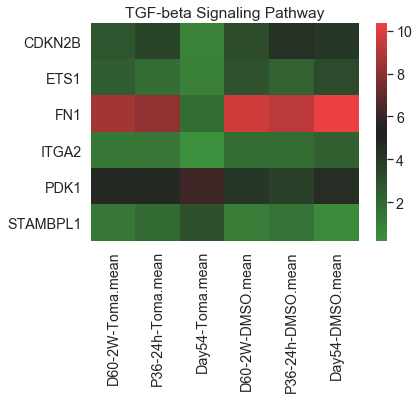

In [11]:
sns.heatmap(tgfdf, cmap=pal).set_title('TGF-beta Signaling Pathway')
plt.savefig('./TGF-beta Signaling Pathway (Homo sapiens).png', dpi=300, bbox_inches='tight')

In [12]:
tt = pd.DataFrame(tgfdf.iloc[:,0].reset_index().iloc[:,1])
tt = tt.rename(columns={'D60-2W-Toma.mean': 'value'})
tt2 = pd.DataFrame(tgfdf.iloc[:,1].reset_index().iloc[:,1])
tt2 = tt2.rename(columns={'P36-24h-Toma.mean': 'value'})
tt = tt.append(tt2)
tt2 = pd.DataFrame(tgfdf.iloc[:,2].reset_index().iloc[:,1])
tt2 = tt2.rename(columns={'Day54-Toma.mean': 'value'})
tt = tt.append(tt2)
tt['sample'] = 'Toma'

td = pd.DataFrame(tgfdf.iloc[:,3].reset_index().iloc[:,1])
td = td.rename(columns={'D60-2W-DMSO.mean': 'value'})
td2 = pd.DataFrame(tgfdf.iloc[:,4].reset_index().iloc[:,1])
td2 = td2.rename(columns={'P36-24h-DMSO.mean': 'value'})
td = td.append(td2)
td2 = pd.DataFrame(tgfdf.iloc[:,5].reset_index().iloc[:,1])
td2 = td2.rename(columns={'Day54-DMSO.mean': 'value'})
td = td.append(td2)
td['sample'] = 'DMSO'


tt = td.append(tt)
tt = tt.reset_index().iloc[:,1:]
tt['gene'] = 'unknown'


k=0
for i in range(0,6):
    for j in range(0,len(tgfdf.index)):
        tt.iloc[k,2] = tgfdf.index[j]
        k=k+1

In [13]:
tt.head()

,value,sample,gene
0,3.227762,DMSO,CDKN2B
1,2.944094,DMSO,ETS1
2,9.630317,DMSO,FN1
3,1.779959,DMSO,ITGA2
4,4.146085,DMSO,PDK1


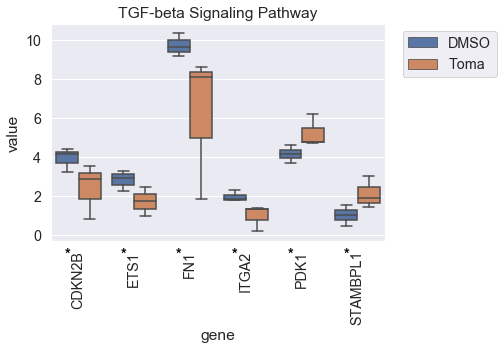

In [14]:
ax = sns.boxplot(data = tt, x = 'gene', y = 'value', hue = 'sample')
ax.set_title('TGF-beta Signaling Pathway')
plt.xticks(rotation=90)

# add_stat_annotation(ax, data=tt, x='gene', y='value', hue='sample',
#                    box_pairs=[(("CDKN2B", "Toma"), ("CDKN2B", "DMSO")),
#                               (("ETS1", "Toma"), ("ETS1", "DMSO")),
#                               (("FN1", "Toma"), ("FN1", "DMSO")),
#                               (("ITGA2", "Toma"), ("ITGA2", "DMSO")),
#                               (("PDK1", "Toma"), ("PDK1", "DMSO")),
#                              (("STAMBPL1", "Toma"), ("STAMBPL1", "DMSO")),
#                                ],
#                    test='Mann-Whitney-ls', text_format='star', loc='inside', verbose=2)

medians = tt.groupby(['gene'])['value'].median()

for xtick in ax.get_xticks():
    ax.text(xtick-0.2,-1.2, '*', 
            horizontalalignment='center',size='x-large',color='black',weight='semibold')

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))

plt.savefig('./TGF-beta Signaling Pathway (Homo sapiens)_box.png', dpi=300, bbox_inches='tight')

---
## Extracellular matrix organization (Homo sapiens)

In [15]:
#Extracellular matrix organization (Homo sapiens)
tgfb = ['3Hyp-4Hyp-COL9A3', '3x4Hyp-3Hyp-5Hyl-COL9A1', '3x4Hyp-3Hyp-5Hyl-COL9A2', '3x4Hyp-3Hyp-5Hyl-COL9A3', '3x4Hyp-3Hyp-COL9A1', '3x4Hyp-3Hyp-COL9A2', '3x4Hyp-3Hyp-GalHyl-COL9A1', '3x4Hyp-3Hyp-GalHyl-COL9A2', '3x4Hyp-3Hyp-GalHyl-COL9A3', '3x4Hyp-3Hyp-GlcGalHyl-COL9A1', '3x4Hyp-3Hyp-GlcGalHyl-COL9A2', '3x4Hyp-3Hyp-GlcGalHyl-COL9A3', '3x4Hyp-5Hyl-COL9A1', '3x4Hyp-5Hyl-COL9A2', '3x4Hyp-5Hyl-COL9A3', '3x4Hyp-COL9A1', '3x4Hyp-COL9A2', '3x4Hyp-COL9A3', '3x4Hyp-GalHyl-COL9A1', '3x4Hyp-GalHyl-COL9A2', '3x4Hyp-GalHyl-COL9A3', '3x4Hyp-GlcGalHyl-COL9A1', '3x4Hyp-GlcGalHyl-COL9A2', '3x4Hyp-GlcGalHyl-COL9A3', '5Hyl-COL9A1', '5Hyl-COL9A2', '5Hyl-COL9A3', 'ADAM12', 'ADAM12,ADAM15,ADAM19', 'ADAM15', 'ADAM19', 'AGRN(30-2045)', 'AGRN(30-2045)', 'AGRN, HSPG2', 'AGRN:Alpha-dystroglycan', 'AGRN:Beta amyloid fibril', 'AGRN:LRP4:MUSK', 'AGRN:Laminins with gamma-1', 'AGRN:NCAM1, PTPRS', 'ASPN', 'Aggrecan', 'Aggrecan:HA:HAPLN1', 'Aggrecan', 'BGN', 'BGN:Collagen types I, VI, (IX)', 'BGN:Collagen types II, III', 'BGN', 'Beta amyloid fibril', 'Beta amyloid fibril', 'Brevican', 'C4S-BGN', 'C6S-BGN', 'CEACAM heterodimer', 'CEACAM1', 'CEACAM6', 'CEACAM8', 'COL18A1(1572-11754)', 'COL9A1', 'COL9A2', 'COL9A3', 'COMP', 'COMP interactors', 'COMP pentamer:COMP interactors', 'COMP pentamer', 'CSE-BGN', 'Ca2+', 'Ca2+', 'Collagen', 'type I', 'fibril:SPARC:Hydroxylapatitie:Ca2+', 'Collagen formation', 'Collagen type I,IV,VI', 'Collagen type I fibril', 'Collagen type I fibre', 'Collagen type I fibril', 'Collagen type I, II,', 'III, IV, V, XI', 'fibrils', 'Collagen type I, II, III, V, X fibrils', 'Collagen type I, II, III, VI fibrils', 'Collagen type II fibril', 'Collagen type III fibril', 'Collagen type IV network:Laminin-1', 'Collagen type IV', 'networks:Collagen', 'type VII fibril', 'Collagen type IV networks', 'Collagen type IV alpha1.alpha1.alpha2 network', 'Collagen type IV alpha1.alpha2.alpha5.alpha6 network', 'Collagen type IV alpha3.alpha4.alpha5 network', 'Collagen type IV networks', 'Collagen type V fibril', 'Collagen type VI fibril', 'Collagen type VI network', 'Collagen type VII fibril:Laminin-332', 'Collagen type VII fibril', 'Collagen type VII fibril', 'Collagen type X fibril', 'Collagen type XI fibril', 'Collagen types I, VI, (IX)', 'Collagen types I-V, VII', 'Collagen types II, III, V', 'Collagen types II, III', 'DAG1(30-653)', 'DAG1(30-653)', 'DAG1(654-895)', 'DCN', 'DCN:Collagen type I, II, III, VI fibrils', 'DCN', 'DDR1', 'DDR1 dimer:Collagen', 'type I, II, III,', 'IV, V, XI fibrils', 'DDR1 dimer', 'DDR2', 'DDR2 dimer:Collagen', 'type I, II, III, V,', 'X fibrils', 'DDR2 dimer', 'DMD', 'DMD', 'DMP1', 'DMP1:Integrin alphVbeta3', 'DMP1', 'DSPP(463-1301)', 'DSPP(463-1301):Integrin alphaVbeta1', 'DSPP(463-1301)', 'Degradation of the', 'extracellular', 'matrix', 'Dystroglycan:AGRN:HSPG2', 'Dystroglycan:Dystrophin:Laminins', 'Dystroglycan:NRXN1', 'Dystroglycan', 'Elastic fibre formation', 'Endostatin dimer', 'FGF2(10-155)', 'FGF2(10-155),', 'Fibronectn matrix, Transthyretin tetramer, PDGFA homodimer, PDGFB', 'homodimer', 'FN1 dimer', 'FN1(32-2386)', 'FN1(32-2386):Collagen types I-V, VII', 'FN1(32-2386)', 'Fibronectin matrix', 'Fibronectin matrix', 'GalHyl-COL9A1', 'GalHyl-COL9A2', 'GalHyl-COL9A3', 'GlcGalHyl-COL9A1', 'GlcGalHyl-COL9A2', 'GlcGalHyl-COL9A3', 'HA', 'HAPLN1', 'HAPLN1', 'HA', 'HSPG2(22-4391)', 'HSPG2(22-4391)', 'HSPG2:Dystroglycan', 'HSPG2:FGF2(10-155),', 'Fibronectn matrix, Transthyretin tetramer, PDGFA homodimer, PDGFB', 'homodimer', 'Hydroxylapatite', 'Hydroxylapatite', 'IBSP', 'IBSP:Collagen type I fibril', 'IBSP', 'ITGA1', 'ITGA2', 'ITGA2B(32-1039)', 'ITGA3(33-1051)', 'ITGA5(42-894)', 'ITGA6(24-1130)', 'ITGA7(34-1181)', 'ITGA8(39-1063)', 'ITGA9', 'ITGAV(31-1048)', 'ITGAX', 'ITGB1', 'ITGB3', 'ITGB4', 'ITGB5', 'ITGB6', 'Integrin alpha2beta1:Laminin-332', 'Integrin', 'alpha3beta1,', 'alpha6beta4:Laminins-332, 511, 521, (211, 221)', 'Integrin', 'alpha3beta1,', 'alpha6beta4', 'Integrin', 'alpha5beta1:FN1', 'dimer', 'Integrin alpha5beta1:Fibronectin matrix', 'Integrin', 'alpha6beta1, alpha7beta1, alpha1beta1, alpha2beta1,', 'alphaVbeta1:Laminin-111', 'Integrin', 'alpha6beta1, alpha7beta1, alpha1beta1, alpha2beta1,', 'alphaVbeta1', 'Integrin alpha6beta1:Laminin-211, 221, 332, 411, 512, 521', 'Integrin alpha7beta1:Laminin-211, 221, 411, 512, 521', 'Integrin', 'alphaVbeta3, alphaVbeta6, alpha2beta1, alpha7beta1, alpha8beta1, alpha9beta1,', 'alphaXbeta1', 'Integrin alpha2beta1', 'Integrin alpha5beta1', 'Integrin alpha6beta1', 'Integrin alpha7beta1', 'Integrin alphaVbeta1', 'Integrin alphaVbeta3', 'Integrin cell', 'surface', 'interactions', 'Integrins', 'alphaVbeta1, alphaVbeta3, alphaVbeta5,', 'alpha2bbeta3', 'KS(2),C4S-ACAN', 'KS(2),C6S-ACAN', 'KS(2),CSE-ACAN', 'KS(2)-FMOD', 'LAMA1', 'LAMA2', 'LAMA3', 'LAMA4', 'LAMA5', 'LAMB1', 'LAMB2', 'LAMB3', 'LAMC1', 'LAMC2', 'LAMC3', 'LRP4', 'LRP4:MUSK', 'LUM', 'Laminin network', 'Laminin-111:Endostatin dimer', 'Laminin-111', 'Laminin-211, 221, 332, 411, 512, 521', 'Laminin-211, 221, 411, 512, 521', 'Laminin-332', 'Laminins', 'with gamma-1,', 'gamma-3:Nidogens:Collagen type IV network', 'Laminins', 'with gamma-1,', 'gamma-3:Nidogens:HSPG2', 'Laminins with', 'alpha-1, -2 or', '-5:HSPG2(22-4391)', 'Laminins with alpha-1, -2 or -5', 'Laminins with', 'gamma-1, gamma-3:Nidogens', '1,2', 'Laminins with gamma-1, gamma-3', 'Laminins with gamma-1', 'Laminins-332, 511, 521, (211, 221)', 'Laminins:Sulfatide', 'Laminins', 'Laminins', 'Lecticans', 'MATN1', 'MATN3', 'MATN4', 'MUSK', 'Mn2+', 'Mn2+', 'NCAM1', 'NCAM1, PTPRS', 'NID1', 'NID2', 'NRXN1', 'NRXN1', 'NTN4', 'NTN4:Laminins with gamma-1, gamma-3', 'NTN4', 'Neurocan', 'Nidogens 1, 2', 'PDGFA', 'PDGFB (82-190)', 'PI(3,4)P2', 'PTPRS', 'SERPINE1', 'SERPINE1', 'SH3PXD2A', 'SH3PXD2A:PI(3,4)P2:ADAM12,ADAM15,ADAM19', 'SH3PXD2A:PI(3,4)P2', 'SLRPs:TGF beta', 'SLRPs', 'SPARC', 'SPARC', 'Sulfatide', 'Sulfatide', 'Syndecan interactions', 'TGF beta', 'TGFB1', 'TGFB2', 'TGFB3', 'TNC', 'TNC:Integrin', 'alphaVbeta3, alphaVbeta6, alpha2beta1, alpha7beta1, alpha8beta1, alpha9beta1,', 'alphaXbeta1', 'TNN', 'TNR', 'TNXB', 'TTR', 'Tenascin-C hexamer', 'Tenascins C, R, (X,', 'N):Fibronectin', 'matrix', 'Tenascins C, R, (X, N):Lecticans', 'Tenascins C, R, (X, N)', 'VTN', 'VTN:Collagen type I,IV,VI', 'VTN:Collagen types II,III,V', 'VTN:Integrins', 'alphaVbeta1, alphaVbeta3, alphaVbeta5,', 'alpha2bbeta3', 'VTN', 'Versican', 'Vitronectin:Plasminogen activator inhibitor 1']

tgfbdf = df.loc[tgfb]
tgfbdf_h = tgfbdf_h.append(df_h.loc[tgfb])
tgfdf = tgfbdf.dropna().drop_duplicates()

C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  after removing the cwd from sys.path.
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """


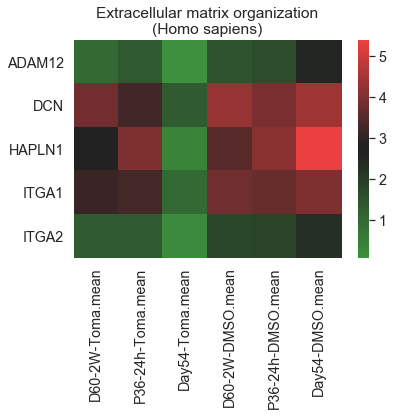

In [16]:
sns.heatmap(tgfdf, cmap=pal).set_title('Extracellular matrix organization\n(Homo sapiens)')
plt.savefig('./Extracellular matrix organization (Homo sapiens).png', dpi=300, bbox_inches='tight')

In [17]:
tt = pd.DataFrame(tgfdf.iloc[:,0].reset_index().iloc[:,1])
tt = tt.rename(columns={'D60-2W-Toma.mean': 'value'})
tt2 = pd.DataFrame(tgfdf.iloc[:,1].reset_index().iloc[:,1])
tt2 = tt2.rename(columns={'P36-24h-Toma.mean': 'value'})
tt = tt.append(tt2)
tt2 = pd.DataFrame(tgfdf.iloc[:,2].reset_index().iloc[:,1])
tt2 = tt2.rename(columns={'Day54-Toma.mean': 'value'})
tt = tt.append(tt2)
tt['sample'] = 'Toma'

td = pd.DataFrame(tgfdf.iloc[:,3].reset_index().iloc[:,1])
td = td.rename(columns={'D60-2W-DMSO.mean': 'value'})
td2 = pd.DataFrame(tgfdf.iloc[:,4].reset_index().iloc[:,1])
td2 = td2.rename(columns={'P36-24h-DMSO.mean': 'value'})
td = td.append(td2)
td2 = pd.DataFrame(tgfdf.iloc[:,5].reset_index().iloc[:,1])
td2 = td2.rename(columns={'Day54-DMSO.mean': 'value'})
td = td.append(td2)
td['sample'] = 'DMSO'


tt = td.append(tt)
tt = tt.reset_index().iloc[:,1:]
tt['gene'] = 'unknown'


k=0
for i in range(0,6):
    for j in range(0,len(tgfdf.index)):
        tt.iloc[k,2] = tgfdf.index[j]
        k=k+1

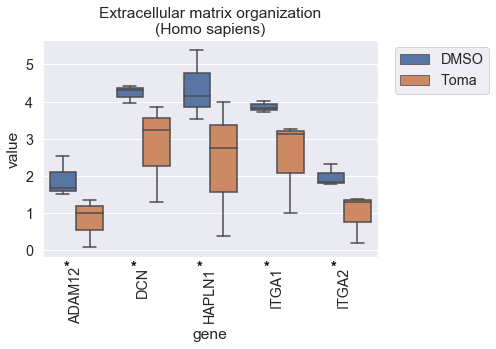

In [18]:
ax = sns.boxplot(data = tt, x = 'gene', y = 'value', hue = 'sample')
ax.set_title('Extracellular matrix organization\n(Homo sapiens)')
plt.xticks(rotation=90)

# add_stat_annotation(ax, data=tt, x='gene', y='value', hue='sample',
#                    box_pairs=[(("ADAM12", "Toma"), ("ADAM12", "DMSO")),
#                               (("DCN", "Toma"), ("DCN", "DMSO")),
#                               (("HAPLN1", "Toma"), ("HAPLN1", "DMSO")),
#                               (("ITGA1", "Toma"), ("ITGA1", "DMSO")),
#                               (("ITGA2", "Toma"), ("ITGA2", "DMSO"))
#                                ],
#                    test='Kruskal', text_format='star', loc='inside', verbose=2)

medians = tt.groupby(['gene'])['value'].median()

for xtick in ax.get_xticks():
    ax.text(xtick-0.15,-0.55, '*', 
            horizontalalignment='center',size='x-large',color='black',weight='semibold')


plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))

plt.savefig('./Extracellular matrix organization (Homo sapiens)_box.png', dpi=300, bbox_inches='tight')

---
## PI3K-Akt Signaling Pathway

In [19]:
#PI3K-Akt Signaling Pathway
tgfb = ['AKT1', 'AKT2', 'AKT3', 'AMP', 'ANGPT1', 'ANGPT2', 'ANGPT4', 'ATF2', 'ATF4', 'ATF6B', 'Angiogenesis', 'Apoptosis', 'B Cell Receptor Signaling Pathway', 'BAD', '', 'BCL2', '', 'BCL2L11', '', 'BCL2L1', '', 'BCR', 'BDNF', 'BRCA1', '', 'C8orf44-SGK3', 'CASP9', '', 'CCND1', '', 'CCND2', '', 'CCND3', '', 'CCNE1', '', 'CCNE2', '', 'CD19', 'CDC37', 'CDK2', '', 'CDK4', '', 'CDK6', '', 'CDKN1A', '', 'CDKN1B', '', 'CHAD', 'CHRM1', 'CHRM2', 'CHUK', '', 'COL1A1', 'COL1A2', 'COL2A1', 'COL4A1', 'COL4A2', 'COL4A3', 'COL4A4', 'COL4A5', 'COL4A6', 'COL6A1', 'COL6A2', 'COL6A3', 'COL6A5', 'COL6A6', 'COL9A1', 'COL9A2', 'COL9A3', 'COMP', 'CREB1', 'CREB3', 'CREB3L1', 'CREB3L2', 'CREB3L3', 'CREB3L4', 'CREB5', 'CSF1', 'CSF1R', 'CSF3', 'CSF3R', 'CSH1', 'CSH2', 'Cell Cycle', 'Cell proliferation', 'Chemokine Signaling Pathway', 'DDIT4', 'DNA Repair', 'EFNA1', 'EFNA2', 'EFNA3', 'EFNA4', 'EFNA5', 'EGF', 'EGFR', 'EIF4B', 'EIF4E1B', 'EIF4E2', 'EIF4EBP1', 'EIF4E', 'EPHA2', 'EPO', 'EPOR', 'ErbB Signaling Pathway', 'F2R', 'FASLG', '', 'FGF10', 'FGF11', 'FGF12', 'FGF13', 'FGF14', 'FGF17', 'FGF18', 'FGF19', 'FGF1', 'FGF20', 'FGF21', 'FGF22', 'FGF23', 'FGF2', 'FGF3', 'FGF4', 'FGF5', 'FGF6', 'FGF7', 'FGF8', 'FGF9', 'FGFR1', 'FGFR2', 'FGFR3', 'FGFR4', 'FLT1', 'FLT3', 'FLT3LG', 'FLT4', 'FN1', 'FOXO3', '', 'Focal Adhesion', 'FoxO Signaling Pathway', 'G6PC2', '', 'G6PC3', '', 'G6PC', '', 'GH1', 'GH2', 'GHR', 'GNB1', 'GNB2', 'GNB3', 'GNB4', 'GNB5', 'GNG10', 'GNG11', 'GNG12', 'GNG13', 'GNG2', 'GNG3', 'GNG4', 'GNG5', 'GNG7', 'GNG8', 'GNGT1', 'GNGT2', 'GRB2', '', 'GSK3B', '', 'GYS1', '', 'GYS2', '', 'Glycolysis and Gluconeogenesis', 'HGF', 'HRAS', '', 'HSP90AA1', 'HSP90AB1', 'HSP90B1', 'IBSP', 'IFNA10', 'IFNA13', 'IFNA14', 'IFNA16', 'IFNA17', 'IFNA1', 'IFNA21', 'IFNA2', 'IFNA4', 'IFNA5', 'IFNA6', 'IFNA7', 'IFNA8', 'IFNAR1', 'IFNAR2', 'IFNB1', 'IGF1', 'IGF1R', 'IGF2', 'IKBKB', '', 'IKBKG', '', 'IL2', 'IL2RA', 'IL2RB', 'IL2RG', 'IL3', 'IL3RA', 'IL4', 'IL4R', 'IL6', 'IL6R', 'IL7', 'IL7R', 'INS', 'INSR', 'IRS1', 'ITGA10', 'ITGA11', 'ITGA1', 'ITGA2B', 'ITGA2', 'ITGA3', 'ITGA4', 'ITGA5', 'ITGA6', 'ITGA7', 'ITGA8', 'ITGA9', 'ITGAV', 'ITGB1', 'ITGB3', 'ITGB4', 'ITGB5', 'ITGB6', 'ITGB7', 'ITGB8', 'Insulin Signaling Pathway', 'JAK/STAT Signaling Pathway', 'JAK1', '', 'JAK2', '', 'JAK3', '', 'KDR', 'KIT', 'KITLG', 'KRAS', '', 'Kik1b4', 'LAMA1', 'LAMA2', 'LAMA3', 'LAMA4', 'LAMA5', 'LAMB1', 'LAMB2', 'LAMB3', 'LAMB4', 'LAMC1', 'LAMC2', 'LAMC3', 'LPAR1', 'LPAR2', 'LPAR3', 'LPAR4', 'LPAR5', 'LPAR6', 'MAP2K1', '', 'MAP2K2', '', 'MAPK Signaling Pathway', 'MAPK1', '', 'MAPK3', '', 'MCL1', '', 'MDM2', '', 'MET', 'MLST8', 'MTOR', 'MYB', '', 'MYC', '', 'Mtcp1', 'NFKB1', '', 'NGF', 'NGFR', 'NOS3', '', 'NRAS', '', 'NTF3', 'NTF4', 'NTRK1', 'NTRK2', 'Nitric oxide', 'OSM', 'OSMR', 'PCK1', '', 'PCK2', '', 'PDGFA', 'PDGFB', 'PDGFC', 'PDGFD', 'PDGFRA', 'PDGFRB', 'PDPK1', 'PGF', 'PHLPP1', 'PHLPP2', 'PIK3AP1', 'PIK3CA', 'PIK3CB', 'PIK3CD', 'PIK3CG', 'PIK3R1', 'PIK3R2', 'PIK3R3', 'PIK3R5', 'PIK3R6', 'PIP2', 'PIP3', 'PKN1', 'PKN2', 'PKN3', 'PPP2CA', 'PPP2CB', 'PPP2R1A', 'PPP2R1B', 'PPP2R2A', 'PPP2R2B', 'PPP2R2C', 'PPP2R2D', 'PPP2R3A', 'PPP2R3B', 'PPP2R3C', 'PPP2R5A', 'PPP2R5B', 'PPP2R5C', 'PPP2R5D', 'PPP2R5E', 'PRKAA1', 'PRKAA2', 'PRKCA', 'PRL', 'PRLR', 'PTEN', 'PTK2', '', 'RAC1', 'RAF1', '', 'RBL2', '', 'RELA', '', 'RELN', 'RHEB', 'RPS6', 'RPS6KB1', 'RPS6KB2', 'RPTOR', 'SGK1', 'SGK2', 'SGK3', 'SOS1', '', 'SOS2', '', 'SPP1', 'STK11', 'SYK', 'TCL1A', 'TCL1B', 'TEK', 'TGFA', 'THBS1', 'THBS2', 'THBS3', 'THBS4', 'THEM4', 'TLR2', 'TLR4', 'TNC', 'TNN', 'TNR', 'TNXB', 'TP53', '', 'TSC1', 'TSC2', 'Toll-like Receptor Signaling Pathway', 'VEGF Signaling Pathway', 'VEGFA', 'VEGFB', 'VEGFC', 'VEGFD', 'VTN', 'VWF', 'mTOR Signaling Pathway']

tgfbdf = df.loc[tgfb]
tgfbdf_h = tgfbdf_h.append(df_h.loc[tgfb])
tgfdf = tgfbdf.dropna().drop_duplicates()

C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  after removing the cwd from sys.path.
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """


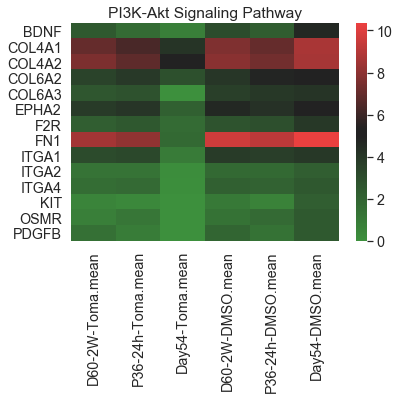

In [20]:
sns.heatmap(tgfdf, cmap=pal).set_title('PI3K-Akt Signaling Pathway')
plt.savefig('./PI3K-Akt Signaling Pathway.png', dpi=300, bbox_inches='tight')

In [21]:
tt = pd.DataFrame(tgfdf.iloc[:,0].reset_index().iloc[:,1])
tt = tt.rename(columns={'D60-2W-Toma.mean': 'value'})
tt2 = pd.DataFrame(tgfdf.iloc[:,1].reset_index().iloc[:,1])
tt2 = tt2.rename(columns={'P36-24h-Toma.mean': 'value'})
tt = tt.append(tt2)
tt2 = pd.DataFrame(tgfdf.iloc[:,2].reset_index().iloc[:,1])
tt2 = tt2.rename(columns={'Day54-Toma.mean': 'value'})
tt = tt.append(tt2)
tt['sample'] = 'Toma'

td = pd.DataFrame(tgfdf.iloc[:,3].reset_index().iloc[:,1])
td = td.rename(columns={'D60-2W-DMSO.mean': 'value'})
td2 = pd.DataFrame(tgfdf.iloc[:,4].reset_index().iloc[:,1])
td2 = td2.rename(columns={'P36-24h-DMSO.mean': 'value'})
td = td.append(td2)
td2 = pd.DataFrame(tgfdf.iloc[:,5].reset_index().iloc[:,1])
td2 = td2.rename(columns={'Day54-DMSO.mean': 'value'})
td = td.append(td2)
td['sample'] = 'DMSO'


tt = td.append(tt)
tt = tt.reset_index().iloc[:,1:]
tt['gene'] = 'unknown'


k=0
for i in range(0,6):
    for j in range(0,len(tgfdf.index)):
        tt.iloc[k,2] = tgfdf.index[j]
        k=k+1

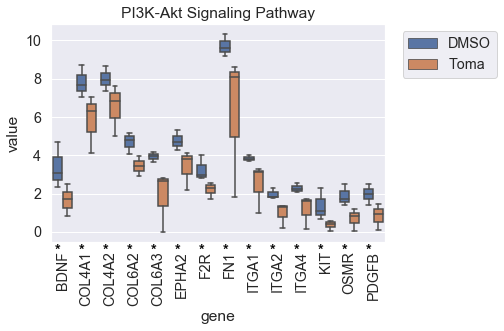

In [22]:
ax = sns.boxplot(data = tt, x = 'gene', y = 'value', hue = 'sample')
ax.set_title('PI3K-Akt Signaling Pathway')
plt.xticks(rotation=90)

#add_stat_annotation(ax, data=tt, x='gene', y='value', hue='sample',
#                    box_pairs=[(("BDNF", "Toma"), ("BDNF", "DMSO")),
#                               (("COL4A1", "Toma"), ("COL4A1", "DMSO")),
#                               (("COL4A2", "Toma"), ("COL4A2", "DMSO")),
#                               (("COL6A2", "Toma"), ("COL6A2", "DMSO")),
#                               (("COL6A3", "Toma"), ("COL6A3", "DMSO")),
#                               (("EPHA2", "Toma"), ("EPHA2", "DMSO")),
#                               (("F2R", "Toma"), ("F2R", "DMSO")),
#                               (("FN1", "Toma"), ("FN1", "DMSO")),
#                               (("ITGA1", "Toma"), ("ITGA1", "DMSO")),
#                               (("ITGA2", "Toma"), ("ITGA2", "DMSO")),
#                               (("ITGA4", "Toma"), ("ITGA4", "DMSO")),
#                               (("KIT", "Toma"), ("KIT", "DMSO")),
#                               (("OSMR", "Toma"), ("OSMR", "DMSO")),
#                               (("PDGFB", "Toma"), ("PDGFB", "DMSO"))
#                                ],
#                    test='Wilcoxon', text_format='star', loc='inside', verbose=2)

medians = tt.groupby(['gene'])['value'].median()

for xtick in ax.get_xticks():
    ax.text(xtick-0.2,-1.2, '*', 
            horizontalalignment='center',size='x-large',color='black',weight='semibold')


plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))

plt.savefig('./PI3K-Akt Signaling Pathway_box.png', dpi=300, bbox_inches='tight')

---
##  Hypertrophic cardiomyopathy (HCM) - Homo sapiens (human)

In [23]:
# Hypertrophic cardiomyopathy (HCM) - Homo sapiens (human)
tgfb = ['ITGA1', ' integrin subunit alpha 1 [KO:K06480]', 'ITGA2', ' integrin subunit alpha 2 [KO:K06481]', 'ITGA2B', ' integrin subunit alpha 2b [KO:K06476]', 'ITGA3', ' integrin subunit alpha 3 [KO:K06482]', 'ITGA4', ' integrin subunit alpha 4 [KO:K06483]', 'ITGA5', ' integrin subunit alpha 5 [KO:K06484]', 'ITGA6', ' integrin subunit alpha 6 [KO:K06485]', 'ITGA7', ' integrin subunit alpha 7 [KO:K06583]', 'ITGA8', ' integrin subunit alpha 8 [KO:K06584]', 'ITGA9', ' integrin subunit alpha 9 [KO:K06585]', 'ITGA10', ' integrin subunit alpha 10 [KO:K06586]', 'ITGA11', ' integrin subunit alpha 11 [KO:K06587]', 'ITGAV', ' integrin subunit alpha V [KO:K06487]', 'ITGB1', ' integrin subunit beta 1 [KO:K05719]', 'ITGB3', ' integrin subunit beta 3 [KO:K06493]', 'ITGB4', ' integrin subunit beta 4 [KO:K06525]', 'ITGB5', ' integrin subunit beta 5 [KO:K06588]', 'ITGB6', ' integrin subunit beta 6 [KO:K06589]', 'ITGB7', ' integrin subunit beta 7 [KO:K06590]', 'ITGB8', ' integrin subunit beta 8 [KO:K06591]', 'SGCD', ' sarcoglycan delta [KO:K12563]', 'SGCG', ' sarcoglycan gamma [KO:K12564]', 'SGCA', ' sarcoglycan alpha [KO:K12565]', 'SGCB', ' sarcoglycan beta [KO:K12566]', 'LAMA1', ' laminin subunit alpha 1 [KO:K05637]', 'LAMA2', ' laminin subunit alpha 2 [KO:K05637]', 'DAG1', ' dystroglycan 1 [KO:K06265]', 'DES', ' desmin [KO:K07610]', 'DMD', ' dystrophin [KO:K10366]', 'ACTB', ' actin beta [KO:K05692]', 'ACTG1', ' actin gamma 1 [KO:K05692]', 'TTN', ' titin [KO:K12567] [EC:2.7.11.1]', 'TNNT2', ' troponin T2, cardiac type [KO:K12045]', 'TNNC1', ' troponin C1, slow skeletal and cardiac type [KO:K05865]', 'TNNI3', ' troponin I3, cardiac type [KO:K12044]', 'ACTC1', ' actin alpha cardiac muscle 1 [KO:K12314]', 'TPM1', ' tropomyosin 1 [KO:K10373]', 'TPM2', ' tropomyosin 2 [KO:K10374]', 'TPM3', ' tropomyosin 3 [KO:K09290]', 'TPM4', ' tropomyosin 4 [KO:K10375]', 'MYBPC3', ' myosin binding protein C3 [KO:K12568]', 'MYL3', ' myosin light chain 3 [KO:K12749]', 'MYL2', ' myosin light chain 2 [KO:K10351]', 'MYH7', ' myosin heavy chain 7 [KO:K17751]', 'MYH6', ' myosin heavy chain 6 [KO:K17751]', 'EMD', ' emerin [KO:K12569]', 'LMNA', ' lamin A/C [KO:K12641]', 'CACNA1C', ' calcium voltage-gated channel subunit alpha1 C [KO:K04850]', 'CACNA1D', ' calcium voltage-gated channel subunit alpha1 D [KO:K04851]', 'CACNA1F', ' calcium voltage-gated channel subunit alpha1 F [KO:K04853]', 'CACNA1S', ' calcium voltage-gated channel subunit alpha1 S [KO:K04857]', 'CACNB1', ' calcium voltage-gated channel auxiliary subunit beta 1 [KO:K04862]', 'CACNB2', ' calcium voltage-gated channel auxiliary subunit beta 2 [KO:K04863]', 'CACNB3', ' calcium voltage-gated channel auxiliary subunit beta 3 [KO:K04864]', 'CACNB4', ' calcium voltage-gated channel auxiliary subunit beta 4 [KO:K04865]', 'CACNA2D1', ' calcium voltage-gated channel auxiliary subunit alpha2delta 1 [KO:K04858]', 'CACNA2D2', ' calcium voltage-gated channel auxiliary subunit alpha2delta 2 [KO:K04859]', 'CACNA2D3', ' calcium voltage-gated channel auxiliary subunit alpha2delta 3 [KO:K04860]', 'CACNA2D4', ' calcium voltage-gated channel auxiliary subunit alpha2delta 4 [KO:K04861]', 'CACNG1', ' calcium voltage-gated channel auxiliary subunit gamma 1 [KO:K04866]', 'CACNG2', ' calcium voltage-gated channel auxiliary subunit gamma 2 [KO:K04867]', 'CACNG3', ' calcium voltage-gated channel auxiliary subunit gamma 3 [KO:K04868]', 'CACNG4', ' calcium voltage-gated channel auxiliary subunit gamma 4 [KO:K04869]', 'CACNG5', ' calcium voltage-gated channel auxiliary subunit gamma 5 [KO:K04870]', 'CACNG6', ' calcium voltage-gated channel auxiliary subunit gamma 6 [KO:K04871]', 'CACNG7', ' calcium voltage-gated channel auxiliary subunit gamma 7 [KO:K04872]', 'CACNG8', ' calcium voltage-gated channel auxiliary subunit gamma 8 [KO:K04873]', 'RYR2', ' ryanodine receptor 2 [KO:K04962]', 'ATP2A1', ' ATPase sarcoplasmic/endoplasmic reticulum Ca2+ transporting 1 [KO:K05853] [EC:7.2.2.10]', 'ATP2A3', ' ATPase sarcoplasmic/endoplasmic reticulum Ca2+ transporting 3 [KO:K05853] [EC:7.2.2.10]', 'ATP2A2', ' ATPase sarcoplasmic/endoplasmic reticulum Ca2+ transporting 2 [KO:K05853] [EC:7.2.2.10]', 'PRKAA1', ' protein kinase AMP-activated catalytic subunit alpha 1 [KO:K07198] [EC:2.7.11.11]', 'PRKAA2', ' protein kinase AMP-activated catalytic subunit alpha 2 [KO:K07198] [EC:2.7.11.11]', 'PRKAB1', ' protein kinase AMP-activated non-catalytic subunit beta 1 [KO:K07199]', 'PRKAB2', ' protein kinase AMP-activated non-catalytic subunit beta 2 [KO:K07199]', 'PRKAG1', ' protein kinase AMP-activated non-catalytic subunit gamma 1 [KO:K07200]', 'PRKAG3', ' protein kinase AMP-activated non-catalytic subunit gamma 3 [KO:K07200]', 'PRKAG2', ' protein kinase AMP-activated non-catalytic subunit gamma 2 [KO:K07200]', 'ACE', ' angiotensin I converting enzyme [KO:K01283] [EC:3.4.15.1]', 'IGF1', ' insulin like growth factor 1 [KO:K05459]', 'TGFB1', ' transforming growth factor beta 1 [KO:K13375]', 'TGFB2', ' transforming growth factor beta 2 [KO:K13376]', 'TGFB3', ' transforming growth factor beta 3 [KO:K13377]', 'TNF', ' tumor necrosis factor [KO:K03156]', 'IL6', ' interleukin 6 [KO:K05405]', 'EDN1', ' endothelin 1 [KO:K16366]', 'AGT', ' angiotensinogen [KO:K09821]', 'SLC8A1', ' solute carrier family 8 member A1 [KO:K05849]', 'SLC8A2', ' solute carrier family 8 member A2 [KO:K05849]', 'SLC8A3', ' solute carrier family 8 member A3 [KO:K05849]', '']

tgfbdf = df.loc[tgfb]
tgfbdf_h = tgfbdf_h.append(df_h.loc[tgfb])
tgfdf = tgfbdf.dropna().drop_duplicates()

C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  after removing the cwd from sys.path.
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """


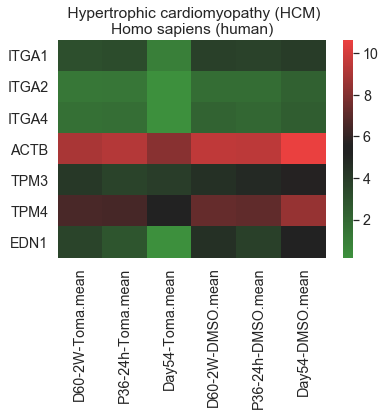

In [24]:
sns.heatmap(tgfdf, cmap=pal).set_title(' Hypertrophic cardiomyopathy (HCM)\nHomo sapiens (human)')
plt.savefig('./Hypertrophic cardiomyopathy (HCM) (Homo sapiens).png', dpi=300, bbox_inches='tight')

In [25]:
tt = pd.DataFrame(tgfdf.iloc[:,0].reset_index().iloc[:,1])
tt = tt.rename(columns={'D60-2W-Toma.mean': 'value'})
tt2 = pd.DataFrame(tgfdf.iloc[:,1].reset_index().iloc[:,1])
tt2 = tt2.rename(columns={'P36-24h-Toma.mean': 'value'})
tt = tt.append(tt2)
tt2 = pd.DataFrame(tgfdf.iloc[:,2].reset_index().iloc[:,1])
tt2 = tt2.rename(columns={'Day54-Toma.mean': 'value'})
tt = tt.append(tt2)
tt['sample'] = 'Toma'

td = pd.DataFrame(tgfdf.iloc[:,3].reset_index().iloc[:,1])
td = td.rename(columns={'D60-2W-DMSO.mean': 'value'})
td2 = pd.DataFrame(tgfdf.iloc[:,4].reset_index().iloc[:,1])
td2 = td2.rename(columns={'P36-24h-DMSO.mean': 'value'})
td = td.append(td2)
td2 = pd.DataFrame(tgfdf.iloc[:,5].reset_index().iloc[:,1])
td2 = td2.rename(columns={'Day54-DMSO.mean': 'value'})
td = td.append(td2)
td['sample'] = 'DMSO'


tt = td.append(tt)
tt = tt.reset_index().iloc[:,1:]
tt['gene'] = 'unknown'


k=0
for i in range(0,6):
    for j in range(0,len(tgfdf.index)):
        tt.iloc[k,2] = tgfdf.index[j]
        k=k+1

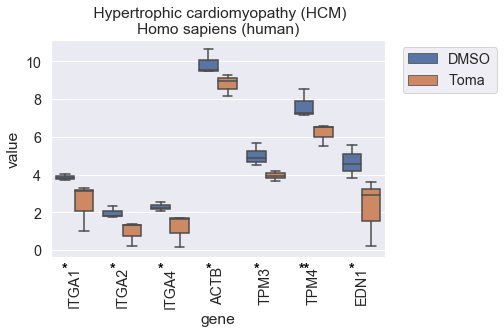

In [26]:
ax = sns.boxplot(data = tt, x = 'gene', y = 'value', hue = 'sample')
ax.set_title(' Hypertrophic cardiomyopathy (HCM)\nHomo sapiens (human)')
plt.xticks(rotation=90)

#add_stat_annotation(ax, data=tt, x='gene', y='value', hue='sample',
#                    box_pairs=[(("BDNF", "Toma"), ("BDNF", "DMSO")),
#                               (("COL4A1", "Toma"), ("COL4A1", "DMSO")),
#                               (("COL4A2", "Toma"), ("COL4A2", "DMSO")),
#                               (("COL6A2", "Toma"), ("COL6A2", "DMSO")),
#                               (("COL6A3", "Toma"), ("COL6A3", "DMSO")),
#                               (("EPHA2", "Toma"), ("EPHA2", "DMSO")),
#                               (("F2R", "Toma"), ("F2R", "DMSO")),
#                               (("FN1", "Toma"), ("FN1", "DMSO")),
#                               (("ITGA1", "Toma"), ("ITGA1", "DMSO")),
#                               (("ITGA2", "Toma"), ("ITGA2", "DMSO")),
#                               (("ITGA4", "Toma"), ("ITGA4", "DMSO")),
#                               (("KIT", "Toma"), ("KIT", "DMSO")),
#                               (("OSMR", "Toma"), ("OSMR", "DMSO")),
#                               (("PDGFB", "Toma"), ("PDGFB", "DMSO"))
#                                ],
#                    test='Wilcoxon', text_format='star', loc='inside', verbose=2)

medians = tt.groupby(['gene'])['value'].median()

for xtick in ax.get_xticks():
    if xtick == 5:
        ax.text(xtick-0.2,-1.2, '**', 
                horizontalalignment='center',size='x-large',color='black',weight='semibold')
    else:
        ax.text(xtick-0.2,-1.2, '*', 
            horizontalalignment='center',size='x-large',color='black',weight='semibold')


plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))

plt.savefig('./Hypertrophic cardiomyopathy (HCM) (Homo sapiens)_box.png', dpi=300, bbox_inches='tight')

---
## Dilated cardiomyopathy (DCM) - Homo sapiens

In [27]:
#Dilated cardiomyopathy (DCM) - Homo sapiens
tgfb = ['ITGA1', ' integrin subunit alpha 1 [KO:K06480]', 'ITGA2', ' integrin subunit alpha 2 [KO:K06481]', 'ITGA2B', ' integrin subunit alpha 2b [KO:K06476]', 'ITGA3', ' integrin subunit alpha 3 [KO:K06482]', 'ITGA4', ' integrin subunit alpha 4 [KO:K06483]', 'ITGA5', ' integrin subunit alpha 5 [KO:K06484]', 'ITGA6', ' integrin subunit alpha 6 [KO:K06485]', 'ITGA7', ' integrin subunit alpha 7 [KO:K06583]', 'ITGA8', ' integrin subunit alpha 8 [KO:K06584]', 'ITGA9', ' integrin subunit alpha 9 [KO:K06585]', 'ITGA10', ' integrin subunit alpha 10 [KO:K06586]', 'ITGA11', ' integrin subunit alpha 11 [KO:K06587]', 'ITGAV', ' integrin subunit alpha V [KO:K06487]', 'ITGB1', ' integrin subunit beta 1 [KO:K05719]', 'ITGB3', ' integrin subunit beta 3 [KO:K06493]', 'ITGB4', ' integrin subunit beta 4 [KO:K06525]', 'ITGB5', ' integrin subunit beta 5 [KO:K06588]', 'ITGB6', ' integrin subunit beta 6 [KO:K06589]', 'ITGB7', ' integrin subunit beta 7 [KO:K06590]', 'ITGB8', ' integrin subunit beta 8 [KO:K06591]', 'SGCD', ' sarcoglycan delta [KO:K12563]', 'SGCG', ' sarcoglycan gamma [KO:K12564]', 'SGCA', ' sarcoglycan alpha [KO:K12565]', 'SGCB', ' sarcoglycan beta [KO:K12566]', 'LAMA1', ' laminin subunit alpha 1 [KO:K05637]', 'LAMA2', ' laminin subunit alpha 2 [KO:K05637]', 'DAG1', ' dystroglycan 1 [KO:K06265]', 'DES', ' desmin [KO:K07610]', 'DMD', ' dystrophin [KO:K10366]', 'ACTB', ' actin beta [KO:K05692]', 'ACTG1', ' actin gamma 1 [KO:K05692]', 'TTN', ' titin [KO:K12567] [EC:2.7.11.1]', 'TNNT2', ' troponin T2, cardiac type [KO:K12045]', 'TNNC1', ' troponin C1, slow skeletal and cardiac type [KO:K05865]', 'TNNI3', ' troponin I3, cardiac type [KO:K12044]', 'ACTC1', ' actin alpha cardiac muscle 1 [KO:K12314]', 'TPM1', ' tropomyosin 1 [KO:K10373]', 'TPM2', ' tropomyosin 2 [KO:K10374]', 'TPM3', ' tropomyosin 3 [KO:K09290]', 'TPM4', ' tropomyosin 4 [KO:K10375]', 'MYBPC3', ' myosin binding protein C3 [KO:K12568]', 'MYL3', ' myosin light chain 3 [KO:K12749]', 'MYL2', ' myosin light chain 2 [KO:K10351]', 'MYH7', ' myosin heavy chain 7 [KO:K17751]', 'MYH6', ' myosin heavy chain 6 [KO:K17751]', 'EMD', ' emerin [KO:K12569]', 'LMNA', ' lamin A/C [KO:K12641]', 'IGH', ' immunoglobulin heavy variable 4-38-2-like [KO:K06856]', 'ADRB1', ' adrenoceptor beta 1 [KO:K04141]', 'GNAS', ' GNAS complex locus [KO:K04632]', 'ADCY1', ' adenylate cyclase 1 [KO:K08041] [EC:4.6.1.1]', 'ADCY2', ' adenylate cyclase 2 [KO:K08042] [EC:4.6.1.1]', 'ADCY3', ' adenylate cyclase 3 [KO:K08043] [EC:4.6.1.1]', 'ADCY4', ' adenylate cyclase 4 [KO:K08044] [EC:4.6.1.1]', 'ADCY5', ' adenylate cyclase 5 [KO:K08045] [EC:4.6.1.1]', 'ADCY6', ' adenylate cyclase 6 [KO:K08046] [EC:4.6.1.1]', 'ADCY7', ' adenylate cyclase 7 [KO:K08047] [EC:4.6.1.1]', 'ADCY8', ' adenylate cyclase 8 [KO:K08048] [EC:4.6.1.1]', 'ADCY9', ' adenylate cyclase 9 [KO:K08049] [EC:4.6.1.1]', 'PRKACA', ' protein kinase cAMP-activated catalytic subunit alpha [KO:K04345] [EC:2.7.11.11]', 'PRKACB', ' protein kinase cAMP-activated catalytic subunit beta [KO:K04345] [EC:2.7.11.11]', 'PRKACG', ' protein kinase cAMP-activated catalytic subunit gamma [KO:K04345] [EC:2.7.11.11]', 'CACNA1C', ' calcium voltage-gated channel subunit alpha1 C [KO:K04850]', 'CACNA1D', ' calcium voltage-gated channel subunit alpha1 D [KO:K04851]', 'CACNA1F', ' calcium voltage-gated channel subunit alpha1 F [KO:K04853]', 'CACNA1S', ' calcium voltage-gated channel subunit alpha1 S [KO:K04857]', 'CACNB1', ' calcium voltage-gated channel auxiliary subunit beta 1 [KO:K04862]', 'CACNB2', ' calcium voltage-gated channel auxiliary subunit beta 2 [KO:K04863]', 'CACNB3', ' calcium voltage-gated channel auxiliary subunit beta 3 [KO:K04864]', 'CACNB4', ' calcium voltage-gated channel auxiliary subunit beta 4 [KO:K04865]', 'CACNA2D1', ' calcium voltage-gated channel auxiliary subunit alpha2delta 1 [KO:K04858]', 'CACNA2D2', ' calcium voltage-gated channel auxiliary subunit alpha2delta 2 [KO:K04859]', 'CACNA2D3', ' calcium voltage-gated channel auxiliary subunit alpha2delta 3 [KO:K04860]', 'CACNA2D4', ' calcium voltage-gated channel auxiliary subunit alpha2delta 4 [KO:K04861]', 'CACNG1', ' calcium voltage-gated channel auxiliary subunit gamma 1 [KO:K04866]', 'CACNG2', ' calcium voltage-gated channel auxiliary subunit gamma 2 [KO:K04867]', 'CACNG3', ' calcium voltage-gated channel auxiliary subunit gamma 3 [KO:K04868]', 'CACNG4', ' calcium voltage-gated channel auxiliary subunit gamma 4 [KO:K04869]', 'CACNG5', ' calcium voltage-gated channel auxiliary subunit gamma 5 [KO:K04870]', 'CACNG6', ' calcium voltage-gated channel auxiliary subunit gamma 6 [KO:K04871]', 'CACNG7', ' calcium voltage-gated channel auxiliary subunit gamma 7 [KO:K04872]', 'CACNG8', ' calcium voltage-gated channel auxiliary subunit gamma 8 [KO:K04873]', 'RYR2', ' ryanodine receptor 2 [KO:K04962]', 'ATP2A1', ' ATPase sarcoplasmic/endoplasmic reticulum Ca2+ transporting 1 [KO:K05853] [EC:7.2.2.10]', 'ATP2A3', ' ATPase sarcoplasmic/endoplasmic reticulum Ca2+ transporting 3 [KO:K05853] [EC:7.2.2.10]', 'ATP2A2', ' ATPase sarcoplasmic/endoplasmic reticulum Ca2+ transporting 2 [KO:K05853] [EC:7.2.2.10]', 'PLN', ' phospholamban [KO:K05852]', 'SLC8A1', ' solute carrier family 8 member A1 [KO:K05849]', 'SLC8A2', ' solute carrier family 8 member A2 [KO:K05849]', 'SLC8A3', ' solute carrier family 8 member A3 [KO:K05849]', 'IGF1', ' insulin like growth factor 1 [KO:K05459]', 'TGFB1', ' transforming growth factor beta 1 [KO:K13375]', 'TGFB2', ' transforming growth factor beta 2 [KO:K13376]', 'TGFB3', ' transforming growth factor beta 3 [KO:K13377]', 'TNF', ' tumor necrosis factor [KO:K03156]', 'AGT', ' angiotensinogen [KO:K09821]', '']

tgfbdf = df.loc[tgfb]
tgfbdf_h = tgfbdf_h.append(df_h.loc[tgfb])
tgfdf = tgfbdf.dropna().drop_duplicates()

C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  after removing the cwd from sys.path.
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """


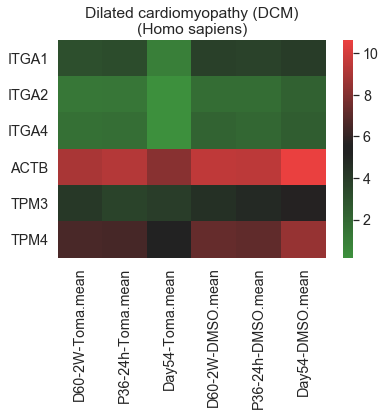

In [28]:
sns.heatmap(tgfdf, cmap=pal).set_title('Dilated cardiomyopathy (DCM)\n(Homo sapiens)')
plt.savefig('./Dilated cardiomyopathy (DCM) - Homo sapiens.png', dpi=300, bbox_inches='tight')

In [29]:
tt = pd.DataFrame(tgfdf.iloc[:,0].reset_index().iloc[:,1])
tt = tt.rename(columns={'D60-2W-Toma.mean': 'value'})
tt2 = pd.DataFrame(tgfdf.iloc[:,1].reset_index().iloc[:,1])
tt2 = tt2.rename(columns={'P36-24h-Toma.mean': 'value'})
tt = tt.append(tt2)
tt2 = pd.DataFrame(tgfdf.iloc[:,2].reset_index().iloc[:,1])
tt2 = tt2.rename(columns={'Day54-Toma.mean': 'value'})
tt = tt.append(tt2)
tt['sample'] = 'Toma'

td = pd.DataFrame(tgfdf.iloc[:,3].reset_index().iloc[:,1])
td = td.rename(columns={'D60-2W-DMSO.mean': 'value'})
td2 = pd.DataFrame(tgfdf.iloc[:,4].reset_index().iloc[:,1])
td2 = td2.rename(columns={'P36-24h-DMSO.mean': 'value'})
td = td.append(td2)
td2 = pd.DataFrame(tgfdf.iloc[:,5].reset_index().iloc[:,1])
td2 = td2.rename(columns={'Day54-DMSO.mean': 'value'})
td = td.append(td2)
td['sample'] = 'DMSO'


tt = td.append(tt)
tt = tt.reset_index().iloc[:,1:]
tt['gene'] = 'unknown'


k=0
for i in range(0,6):
    for j in range(0,len(tgfdf.index)):
        tt.iloc[k,2] = tgfdf.index[j]
        k=k+1

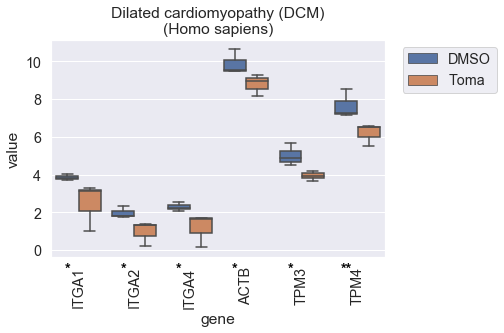

In [30]:
ax = sns.boxplot(data = tt, x = 'gene', y = 'value', hue = 'sample')
ax.set_title('Dilated cardiomyopathy (DCM)\n(Homo sapiens)')
plt.xticks(rotation=90)

#add_stat_annotation(ax, data=tt, x='gene', y='value', hue='sample',
#                    box_pairs=[(("BDNF", "Toma"), ("BDNF", "DMSO")),
#                               (("COL4A1", "Toma"), ("COL4A1", "DMSO")),
#                               (("COL4A2", "Toma"), ("COL4A2", "DMSO")),
#                               (("COL6A2", "Toma"), ("COL6A2", "DMSO")),
#                               (("COL6A3", "Toma"), ("COL6A3", "DMSO")),
#                               (("EPHA2", "Toma"), ("EPHA2", "DMSO")),
#                               (("F2R", "Toma"), ("F2R", "DMSO")),
#                               (("FN1", "Toma"), ("FN1", "DMSO")),
#                               (("ITGA1", "Toma"), ("ITGA1", "DMSO")),
#                               (("ITGA2", "Toma"), ("ITGA2", "DMSO")),
#                               (("ITGA4", "Toma"), ("ITGA4", "DMSO")),
#                               (("KIT", "Toma"), ("KIT", "DMSO")),
#                               (("OSMR", "Toma"), ("OSMR", "DMSO")),
#                               (("PDGFB", "Toma"), ("PDGFB", "DMSO"))
#                                ],
#                    test='Wilcoxon', text_format='star', loc='inside', verbose=2)

medians = tt.groupby(['gene'])['value'].median()

for xtick in ax.get_xticks():
    if xtick == 5:
        ax.text(xtick-0.2,-1.2, '**', 
                horizontalalignment='center',size='x-large',color='black',weight='semibold')
    else:
        ax.text(xtick-0.2,-1.2, '*', 
            horizontalalignment='center',size='x-large',color='black',weight='semibold')

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))

plt.savefig('./Dilated cardiomyopathy (DCM) - Homo sapiens_box.png', dpi=300, bbox_inches='tight')

---
## Arrhythmogenic right ventricular cardiomyopathy (ARVC) - Homo sapiens (human)

In [31]:
#Arrhythmogenic right ventricular cardiomyopathy (ARVC) - Homo sapiens (human)
tgfb = ['ACTB', 'ACTG1', 'ACTN1', 'ACTN2', 'ACTN3', 'ACTN4', 'ATP2A2', 'CACNA1C', 'CACNA1D', 'CACNA1F', 'CACNA1S', 'CACNA2D1', 'CACNA2D2', 'CACNA2D3', 'CACNA2D4', 'CACNB1', 'CACNB2', 'CACNB3', 'CACNB4', 'CACNG1', 'CACNG2', 'CACNG3', 'CACNG4', 'CACNG5', 'CACNG6', 'CACNG7', 'CACNG8', 'CDH2', 'CTNNA1', 'CTNNA2', 'CTNNA3', 'CTNNB1', 'Calcium', 'Cardiac muscle contraction', 'DAG1', 'DES', 'DMD', 'DSC2', 'DSG2', 'DSP', 'ECM-receptor interaction', 'EMD', 'GJA1', 'Gap junction', 'ITGA10', 'ITGA11', 'ITGA1', 'ITGA2', 'ITGA2B', 'ITGA3', 'ITGA4', 'ITGA5', 'ITGA6', 'ITGA7', 'ITGA8', 'ITGA9', 'ITGAV', 'ITGB1', 'ITGB3', 'ITGB4', 'ITGB5', 'ITGB6', 'ITGB7', 'ITGB8', 'JUP', 'LAMA2', 'LEF1', 'LMNA', 'PKP2', 'RYR2', 'SGCA', 'SGCB', 'SGCD', 'SGCG', 'SLC8A1', 'Sodium', 'TCF7', 'TCF7L1', 'TCF7L2', 'Wnt signaling pathway']

tgfbdf = df.loc[tgfb]
tgfbdf_h = tgfbdf_h.append(df_h.loc[tgfb])
tgfdf = tgfbdf.dropna().drop_duplicates()

C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  after removing the cwd from sys.path.
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """


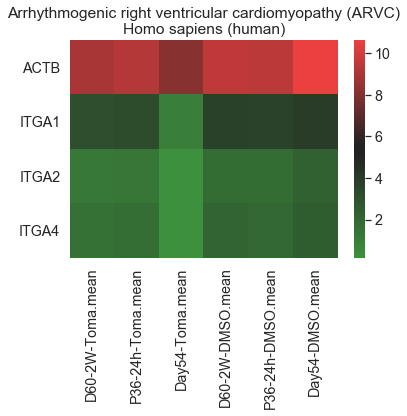

In [32]:
sns.heatmap(tgfdf, cmap=pal).set_title('Arrhythmogenic right ventricular cardiomyopathy (ARVC)\nHomo sapiens (human)')
plt.yticks(rotation=0)
plt.savefig('./Arrhythmogenic Right Ventricular Cardiomyopathy (Homo sapiens).png', dpi=300, bbox_inches='tight')

In [33]:
tt = pd.DataFrame(tgfdf.iloc[:,0].reset_index().iloc[:,1])
tt = tt.rename(columns={'D60-2W-Toma.mean': 'value'})
tt2 = pd.DataFrame(tgfdf.iloc[:,1].reset_index().iloc[:,1])
tt2 = tt2.rename(columns={'P36-24h-Toma.mean': 'value'})
tt = tt.append(tt2)
tt2 = pd.DataFrame(tgfdf.iloc[:,2].reset_index().iloc[:,1])
tt2 = tt2.rename(columns={'Day54-Toma.mean': 'value'})
tt = tt.append(tt2)
tt['sample'] = 'Toma'

td = pd.DataFrame(tgfdf.iloc[:,3].reset_index().iloc[:,1])
td = td.rename(columns={'D60-2W-DMSO.mean': 'value'})
td2 = pd.DataFrame(tgfdf.iloc[:,4].reset_index().iloc[:,1])
td2 = td2.rename(columns={'P36-24h-DMSO.mean': 'value'})
td = td.append(td2)
td2 = pd.DataFrame(tgfdf.iloc[:,5].reset_index().iloc[:,1])
td2 = td2.rename(columns={'Day54-DMSO.mean': 'value'})
td = td.append(td2)
td['sample'] = 'DMSO'


tt = td.append(tt)
tt = tt.reset_index().iloc[:,1:]
tt['gene'] = 'unknown'


k=0
for i in range(0,6):
    for j in range(0,len(tgfdf.index)):
        tt.iloc[k,2] = tgfdf.index[j]
        k=k+1

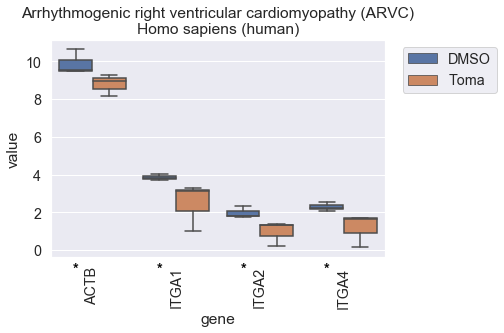

In [34]:
ax = sns.boxplot(data = tt, x = 'gene', y = 'value', hue = 'sample')
ax.set_title('Arrhythmogenic right ventricular cardiomyopathy (ARVC)\nHomo sapiens (human)')
plt.xticks(rotation=90)

#add_stat_annotation(ax, data=tt, x='gene', y='value', hue='sample',
#                    box_pairs=[(("BDNF", "Toma"), ("BDNF", "DMSO")),
#                               (("COL4A1", "Toma"), ("COL4A1", "DMSO")),
#                               (("COL4A2", "Toma"), ("COL4A2", "DMSO")),
#                               (("COL6A2", "Toma"), ("COL6A2", "DMSO")),
#                               (("COL6A3", "Toma"), ("COL6A3", "DMSO")),
#                               (("EPHA2", "Toma"), ("EPHA2", "DMSO")),
#                               (("F2R", "Toma"), ("F2R", "DMSO")),
#                               (("FN1", "Toma"), ("FN1", "DMSO")),
#                               (("ITGA1", "Toma"), ("ITGA1", "DMSO")),
#                               (("ITGA2", "Toma"), ("ITGA2", "DMSO")),
#                               (("ITGA4", "Toma"), ("ITGA4", "DMSO")),
#                               (("KIT", "Toma"), ("KIT", "DMSO")),
#                               (("OSMR", "Toma"), ("OSMR", "DMSO")),
#                               (("PDGFB", "Toma"), ("PDGFB", "DMSO"))
#                                ],
#                    test='Wilcoxon', text_format='star', loc='inside', verbose=2)

medians = tt.groupby(['gene'])['value'].median()

for xtick in ax.get_xticks():
        ax.text(xtick-0.2,-1.2, '*', 
            horizontalalignment='center',size='x-large',color='black',weight='semibold')

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))

plt.savefig('./Arrhythmogenic Right Ventricular Cardiomyopathy (Homo sapiens)_box.png', dpi=300, bbox_inches='tight')

---
## NRF2 pathway

In [35]:
#NRF2 pathway
tgfb = ['ABCC2', 'ABCC3', 'ABCC4', 'ABCC5', 'ADH7', 'AGER', 'ALDH3A1', 'BLVRB', 'CBR1', 'CBR3', 'CES1', 'CES2', 'CES3', 'CES4A', 'CES5A', 'CYP2A6', 'CYP4A11', 'DNAJB1', 'EGR1', 'EPHA2', 'EPHA3', 'FGF13', 'FTH1', 'FTL', 'G6PD', 'GCLC', 'GCLM', 'GGT1', 'GPX2', 'GPX3', 'GSR', 'GSTA1', 'GSTA2', 'GSTA3', 'GSTA4', 'GSTA5', 'GSTM1', 'GSTM2', 'GSTM3', 'GSTM4', 'GSTM5', 'GSTP1', 'GSTT1', 'GSTT2', 'HBEGF', 'HGF', 'HMOX1', 'HSP90AA1', 'HSP90AB1', 'HSPA1A', 'KEAP1', 'Ligand', 'MAFF', 'MAFG', 'ME1', 'MGST2', 'MGST3', 'NFE2L2', 'NQO1', 'NRG1', 'PDGFB', 'PGD', 'PPARD', 'PRDX1', 'PRDX6', 'PTGR1', 'RXRA', 'SERPINA1', 'SLC2A10', 'SLC2A11', 'SLC2A12', 'SLC2A13', 'SLC2A14', 'SLC2A1', 'SLC2A2', 'SLC2A3', 'SLC2A4', 'SLC2A5', 'SLC2A6', 'SLC2A7', 'SLC2A8', 'SLC2A9', 'SLC39A10', 'SLC39A11', 'SLC39A12', 'SLC39A13', 'SLC39A14', 'SLC39A1', 'SLC39A2', 'SLC39A3', 'SLC39A4', 'SLC39A5', 'SLC39A6', 'SLC39A7', 'SLC39A8', 'SLC39A9', 'SLC5A10', 'SLC5A11', 'SLC5A12', 'SLC5A1', 'SLC5A2', 'SLC5A3', 'SLC5A4', 'SLC5A5', 'SLC5A6', 'SLC5A7', 'SLC5A8', 'SLC5A9', 'SLC6A11', 'SLC6A13', 'SLC6A14', 'SLC6A15', 'SLC6A16', 'SLC6A17', 'SLC6A18', 'SLC6A19', 'SLC6A1', 'SLC6A20', 'SLC6A2', 'SLC6A3', 'SLC6A4', 'SLC6A5', 'SLC6A6', 'SLC6A7', 'SLC6A8', 'SLC6A9', 'SLC7A11', 'SOD3', 'SQSTM1', 'SRXN1', 'TGFA', 'TGFB1', 'TGFB2', 'TGFBR2', 'TXN', 'TXNRD1', 'TXNRD3', 'UGT1A1', 'UGT1A3', 'UGT1A4', 'UGT1A6', 'UGT1A7', 'UGT1A9', 'UGT2B7']

tgfbdf = df.loc[tgfb]
tgfbdf_h = tgfbdf_h.append(df_h.loc[tgfb])
tgfdf = tgfbdf.dropna().drop_duplicates()

C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  after removing the cwd from sys.path.
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """


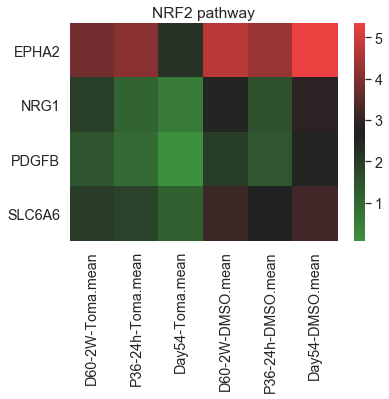

In [36]:
sns.heatmap(tgfdf, cmap=pal).set_title('NRF2 pathway')
plt.yticks(rotation=0)
plt.savefig('./NRF2 pathway (Homo sapiens).png', dpi=300, bbox_inches='tight')

In [37]:
tt = pd.DataFrame(tgfdf.iloc[:,0].reset_index().iloc[:,1])
tt = tt.rename(columns={'D60-2W-Toma.mean': 'value'})
tt2 = pd.DataFrame(tgfdf.iloc[:,1].reset_index().iloc[:,1])
tt2 = tt2.rename(columns={'P36-24h-Toma.mean': 'value'})
tt = tt.append(tt2)
tt2 = pd.DataFrame(tgfdf.iloc[:,2].reset_index().iloc[:,1])
tt2 = tt2.rename(columns={'Day54-Toma.mean': 'value'})
tt = tt.append(tt2)
tt['sample'] = 'Toma'

td = pd.DataFrame(tgfdf.iloc[:,3].reset_index().iloc[:,1])
td = td.rename(columns={'D60-2W-DMSO.mean': 'value'})
td2 = pd.DataFrame(tgfdf.iloc[:,4].reset_index().iloc[:,1])
td2 = td2.rename(columns={'P36-24h-DMSO.mean': 'value'})
td = td.append(td2)
td2 = pd.DataFrame(tgfdf.iloc[:,5].reset_index().iloc[:,1])
td2 = td2.rename(columns={'Day54-DMSO.mean': 'value'})
td = td.append(td2)
td['sample'] = 'DMSO'


tt = td.append(tt)
tt = tt.reset_index().iloc[:,1:]
tt['gene'] = 'unknown'


k=0
for i in range(0,6):
    for j in range(0,len(tgfdf.index)):
        tt.iloc[k,2] = tgfdf.index[j]
        k=k+1

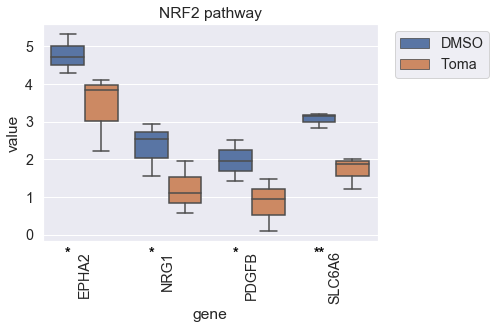

In [38]:
ax = sns.boxplot(data = tt, x = 'gene', y = 'value', hue = 'sample')
ax.set_title('NRF2 pathway')
plt.xticks(rotation=90)

#add_stat_annotation(ax, data=tt, x='gene', y='value', hue='sample',
#                    box_pairs=[(("BDNF", "Toma"), ("BDNF", "DMSO")),
#                               (("COL4A1", "Toma"), ("COL4A1", "DMSO")),
#                               (("COL4A2", "Toma"), ("COL4A2", "DMSO")),
#                               (("COL6A2", "Toma"), ("COL6A2", "DMSO")),
#                               (("COL6A3", "Toma"), ("COL6A3", "DMSO")),
#                               (("EPHA2", "Toma"), ("EPHA2", "DMSO")),
#                               (("F2R", "Toma"), ("F2R", "DMSO")),
#                               (("FN1", "Toma"), ("FN1", "DMSO")),
#                               (("ITGA1", "Toma"), ("ITGA1", "DMSO")),
#                               (("ITGA2", "Toma"), ("ITGA2", "DMSO")),
#                               (("ITGA4", "Toma"), ("ITGA4", "DMSO")),
#                               (("KIT", "Toma"), ("KIT", "DMSO")),
#                               (("OSMR", "Toma"), ("OSMR", "DMSO")),
#                               (("PDGFB", "Toma"), ("PDGFB", "DMSO"))
#                                ],
#                    test='Wilcoxon', text_format='star', loc='inside', verbose=2)

medians = tt.groupby(['gene'])['value'].median()

for xtick in ax.get_xticks():
    if xtick == 3:
        ax.text(xtick-0.2,-0.6, '**', 
                horizontalalignment='center',size='x-large',color='black',weight='semibold')
    else:
        ax.text(xtick-0.2,-0.6, '*', 
            horizontalalignment='center',size='x-large',color='black',weight='semibold')

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))

plt.savefig('./NRF2 pathway (Homo sapiens)_box.png', dpi=300, bbox_inches='tight')

---
## Ras Signaling (Homo sapiens)

In [39]:
#Ras Signaling (Homo sapiens)
tgfb = ['ABL1', 'ABL2', 'AFDN', 'AKT1', 'AKT2', 'AKT3', 'ARF6', 'BAD', 'BCL2L1', 'BRAP', 'BUB1B-PAK6', 'CALM1', 'CALM2', 'CALM3', 'CALML3', 'CALML4', 'CALML5', 'CALML6', 'CDC42', 'CHUK', 'CSF1R', 'Ca2+', 'DAG', 'EGFR', 'ELK1', 'EPHA2', 'ETS1', 'ETS2', 'EXOC2', 'FASLG', 'FGFR1', 'FGFR2', 'FGFR3', 'FGFR4', 'FLT1', 'FLT3', 'FLT4', 'FOXO4', 'GAB1', 'GAB2', 'GDP', 'GNB1', 'GNB2', 'GNB3', 'GNB4', 'GNB5', 'GNG10', 'GNG11', 'GNG12', 'GNG13', 'GNG2', 'GNG3', 'GNG4', 'GNG5', 'GNG7', 'GNG8', 'GNGT1', 'GNGT2', 'GRB2', 'GRIN1', 'GRIN2A', 'GRIN2B', 'GTP', 'HRAS', 'HTR7', 'IGF1R', 'IKBKB', 'IKBKG', 'INSR', 'IP3', 'JMJD7-PLA2G4B', 'KDR', 'KIT', 'KRAS', 'KSR1', 'KSR2', 'LAT', 'MAP2K1', 'MAP2K2', 'MAPK10', 'MAPK1', 'MAPK3', 'MAPK8', 'MAPK9', 'MET', 'MRAS', 'NF1', 'NFKB1', 'NGFR', 'NRAS', 'NTRK1', 'NTRK2', 'PAK1', 'PAK2', 'PAK3', 'PAK4', 'PAK5', 'PAK6', 'PDGFRA', 'PDGFRB', 'PIK3CA', 'PIK3CB', 'PIK3CD', 'PIK3R1', 'PIK3R2', 'PIK3R3', 'PIP3', 'PLA1A', 'PLA2G10', 'PLA2G12A', 'PLA2G12B', 'PLA2G16', 'PLA2G1B', 'PLA2G2A', 'PLA2G2C', 'PLA2G2D', 'PLA2G2E', 'PLA2G2F', 'PLA2G3', 'PLA2G4A', 'PLA2G4B', 'PLA2G4C', 'PLA2G4D', 'PLA2G4E', 'PLA2G4F', 'PLA2G5', 'PLA2G6', 'PLCE1', 'PLCG1', 'PLCG2', 'PLD1', 'PLD2', 'PRKACA', 'PRKACB', 'PRKACG', 'PRKCA', 'PRKCB', 'PRKCG', 'PTPN11', 'RAB5A', 'RAB5B', 'RAB5C', 'RAC1', 'RAC2', 'RAC3', 'RAF1', 'RALA', 'RALB', 'RALBP1', 'RALGDS', 'RAP1A', 'RAP1B', 'RAPGEF5', 'RASA1', 'RASA2', 'RASA3', 'RASA4B', 'RASA4', 'RASAL1', 'RASAL2', 'RASAL3', 'RASGRF1', 'RASGRF2', 'RASGRP1', 'RASGRP2', 'RASGRP3', 'RASGRP4', 'RASSF1', 'RASSF5', 'REL', 'RELA', 'RGL1', 'RGL2', 'RHOA', 'RIN1', 'RRAS2', 'RRAS', 'SHC1', 'SHC2', 'SHC3', 'SHC4', 'SHOC2', 'SOS1', 'SOS2', 'STK4', 'SYNGAP1', 'TEK', 'TIAM1', 'TTBK1', 'ZAP70', 'cAMP']

tgfbdf = df.loc[tgfb]
tgfbdf_h = tgfbdf_h.append(df_h.loc[tgfb])
tgfdf = tgfbdf.dropna().drop_duplicates()

C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  after removing the cwd from sys.path.
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """


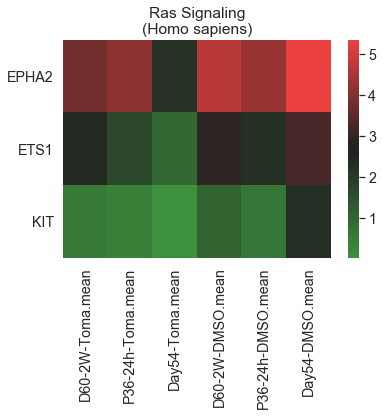

In [40]:
sns.heatmap(tgfdf, cmap=pal).set_title('Ras Signaling\n(Homo sapiens)')
plt.yticks(rotation=0)
plt.savefig('./Ras Signaling (Homo sapiens).png', dpi=300, bbox_inches='tight')

In [41]:
tt = pd.DataFrame(tgfdf.iloc[:,0].reset_index().iloc[:,1])
tt = tt.rename(columns={'D60-2W-Toma.mean': 'value'})
tt2 = pd.DataFrame(tgfdf.iloc[:,1].reset_index().iloc[:,1])
tt2 = tt2.rename(columns={'P36-24h-Toma.mean': 'value'})
tt = tt.append(tt2)
tt2 = pd.DataFrame(tgfdf.iloc[:,2].reset_index().iloc[:,1])
tt2 = tt2.rename(columns={'Day54-Toma.mean': 'value'})
tt = tt.append(tt2)
tt['sample'] = 'Toma'

td = pd.DataFrame(tgfdf.iloc[:,3].reset_index().iloc[:,1])
td = td.rename(columns={'D60-2W-DMSO.mean': 'value'})
td2 = pd.DataFrame(tgfdf.iloc[:,4].reset_index().iloc[:,1])
td2 = td2.rename(columns={'P36-24h-DMSO.mean': 'value'})
td = td.append(td2)
td2 = pd.DataFrame(tgfdf.iloc[:,5].reset_index().iloc[:,1])
td2 = td2.rename(columns={'Day54-DMSO.mean': 'value'})
td = td.append(td2)
td['sample'] = 'DMSO'


tt = td.append(tt)
tt = tt.reset_index().iloc[:,1:]
tt['gene'] = 'unknown'


k=0
for i in range(0,6):
    for j in range(0,len(tgfdf.index)):
        tt.iloc[k,2] = tgfdf.index[j]
        k=k+1

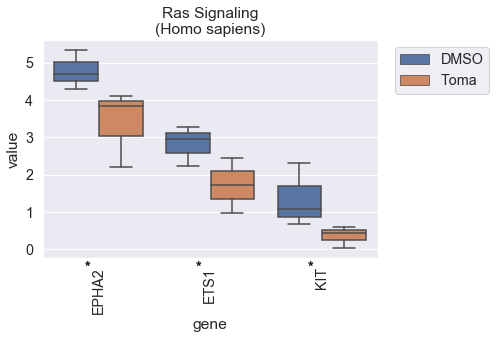

In [42]:
ax = sns.boxplot(data = tt, x = 'gene', y = 'value', hue = 'sample')
ax.set_title('Ras Signaling\n(Homo sapiens)')
plt.xticks(rotation=90)

#add_stat_annotation(ax, data=tt, x='gene', y='value', hue='sample',
#                    box_pairs=[(("BDNF", "Toma"), ("BDNF", "DMSO")),
#                               (("COL4A1", "Toma"), ("COL4A1", "DMSO")),
#                               (("COL4A2", "Toma"), ("COL4A2", "DMSO")),
#                               (("COL6A2", "Toma"), ("COL6A2", "DMSO")),
#                               (("COL6A3", "Toma"), ("COL6A3", "DMSO")),
#                               (("EPHA2", "Toma"), ("EPHA2", "DMSO")),
#                               (("F2R", "Toma"), ("F2R", "DMSO")),
#                               (("FN1", "Toma"), ("FN1", "DMSO")),
#                               (("ITGA1", "Toma"), ("ITGA1", "DMSO")),
#                               (("ITGA2", "Toma"), ("ITGA2", "DMSO")),
#                               (("ITGA4", "Toma"), ("ITGA4", "DMSO")),
#                               (("KIT", "Toma"), ("KIT", "DMSO")),
#                               (("OSMR", "Toma"), ("OSMR", "DMSO")),
#                               (("PDGFB", "Toma"), ("PDGFB", "DMSO"))
#                                ],
#                    test='Wilcoxon', text_format='star', loc='inside', verbose=2)

medians = tt.groupby(['gene'])['value'].median()

for xtick in ax.get_xticks():
    ax.text(xtick-0.1,-0.6, '*', 
            horizontalalignment='center',size='x-large',color='black',weight='semibold')

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))

plt.savefig('./Ras Signaling (Homo sapiens)_box.png', dpi=300, bbox_inches='tight')

---
## Regulation of lipid metabolism by Peroxisome proliferator-activated receptor alpha (PPARalpha)

In [43]:
#Regulation of lipid metabolism by Peroxisome proliferator-activated receptor alpha (PPARalpha)
tgfb = ['13(S)-HODE', '4xPalmC-CD36', '9S-HODE', 'AA', 'ABCA1 gene', 'ABCA1 gene', 'ABCA1', 'ABCA1gene:NR1H2,3:RXR:NCOR:GPS2:TBL1:HDAC3', 'ABCB4 gene', 'ABCB4', 'ACADM gene', 'ACADM', 'ACOX1 gene', 'ACOX1-1', 'ACSL1 gene', 'ACSL1', 'AGT gene', 'AGT', 'AHR', 'AHR:TCDD:ARNT', 'AHRR', 'AHRR:ARNT', 'ALA', 'ALAS1 gene:NRF1:PPARGC1B', 'ALAS1 gene', 'ALAS1 gene', 'ALAS1', 'ANGPTL gene', 'ANGPTL4', 'ANKRD1 gene', 'ANKRD1', 'APOA1 gene', 'APOA1(25-266)', 'APOA2 gene', 'APOA2(24-100)', 'APOA5 gene', 'APOA5', 'ARNT', 'ARNT2', 'Actos', 'Aryl hydrocarbon receptor signalling', '', '', 'CARM1', 'CCNC', 'CD36 gene', 'CDCA', 'CDK19', 'CDK8', 'CHD9', 'CPT1A gene', 'CPT1A gene', 'CPT1A', 'CPT2 gene', 'CPT2', 'CREBBP', 'CYP1A1 gene', 'CYP1A1', 'CYP4A11 gene', 'CYP4A11', 'CYP7A1 gene', 'CYP7A1', 'Coactivators of PPARalpha', 'Corepressors of PPARalpha', 'DCA', 'EP300', 'EPA', 'ESRRA', 'FABP1', 'FABP1 gene', 'FABP1:ligands of PPARA', 'FABP1', 'FADS1 gene', 'FADS1', 'FAM120B', 'FDFT1 gene', 'FDFT1 gene', 'FDFT1', 'FHL2 gene', 'FHL2', 'G0S2 gene', 'G0S2', 'GLIPR1 gene', 'GLIPR1', 'GPS2', 'GRHL1 gene', 'GRHL1', 'HDAC3', 'HELZ2', 'HMGCR gene', 'HMGCR gene', 'HMGCR-1', 'HMGCS1 gene', 'HMGCS1 gene', 'HMGCS1', 'HMGCS2 gene', 'HMGCS2', 'LCHA', 'LINA', 'ME1 gene', 'ME1', 'MED1', 'MED10', 'MED11', 'MED12', 'MED13', 'MED13L', 'MED14', 'MED15', 'MED16', 'MED17', 'MED18', 'MED19', 'MED20', 'MED21', 'MED22', 'MED23', 'MED24', 'MED25', 'MED26', 'MED27', 'MED28', 'MED29', 'MED30', 'MED31', 'MED4', 'MED6', 'MED7', 'MED8', 'MED9', 'MTF1', 'dimer:12Zn2+:HMGCR', 'gene', 'MTF1', 'NCOA1', 'NCOA1,2:RXRA:NR1H4:DCA,CDCA,LCHA', 'NCOA2', 'NCOA3', 'NCOA6', 'NCOR1', 'NCOR2', 'NFYA', 'NFYB', 'NFYC', 'NPAS2 gene', 'NPAS2 gene', 'NPAS2', 'NR1D1', 'NR1D1:heme:Corepressors:NPAS2 gene', 'NR1H2', 'NR1H3', 'NR1H4', 'NRF1', 'PEX11A gene', 'PEX11A', 'PLIN2 gene', 'PLIN2', 'PPARA', 'PPARA gene', 'PPARA gene', 'PPARA:RXRA Coactivator complex', 'PPARA:RXRA Corepressor complex', 'PPARA:RXRA heterodimer', 'PPARA', 'PPARG', 'PPARG:Fatty Acid:RXRA:Mediator:Coactivator Complex', 'PPARGC1A', 'PPARGC1B', 'Palm', 'Peroxisome', 'Proliferator Receptor Element', '(PPRE)', 'Peroxisome Proliferator Receptor Element (PPRE)', 'RGL1 gene', 'RGL1', 'RGZ', 'RORA', 'RORA:EP300:CPT1A gene', 'RORA:EP300:NPAS2 gene', 'RXRA', 'RXRA', 'RXRB', 'SIN3A', 'SIN3B-1', 'SLC27A1 gene', 'SLC27A1', 'SMARCD3', 'SP1', 'SREBF1-1(1-490)', 'SREBF1-3', 'SREBF2(1-484)', 'SREBP1A,1C,2:NF-Y:HMGCS1 gene', 'SREBP1A,1C,2:NF-Y:SP1:FDFT1 gene', 'SREBP1A,2:NF-Y:HMGCR gene', 'SULT2A1 gene', 'SULT2A1', 'TBL1X', 'TBL1X', 'TBL1XR1', 'TBL1XR1', 'TCDD', 'TGS1', 'THRAP3', 'TIAM2 gene', 'TIAM2', 'TNFRSF21 gene', 'TNFRSF21', 'TRIB3 gene', 'TRIB3', 'TXNRD1 gene', 'TXNRD1', 'UGT1A9 gene', 'UGT1A9', 'Zn2+', 'ferriheme b', 'p-BMAL1:p-CLOCK,NPAS2:PPARA gene', 'p-S-ARNTL', 'p-S-CLOCK', 'p-S-NPAS2']

tgfbdf = df.loc[tgfb]
tgfbdf_h = tgfbdf_h.append(df_h.loc[tgfb])
tgfdf = tgfbdf.dropna().drop_duplicates()

C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  after removing the cwd from sys.path.
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """


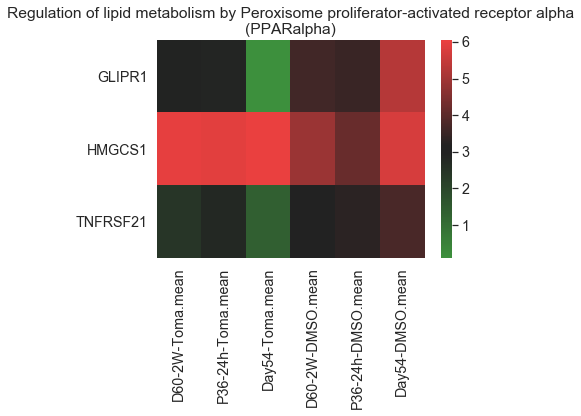

In [44]:
sns.heatmap(tgfdf, cmap=pal).set_title('Regulation of lipid metabolism by Peroxisome proliferator-activated receptor alpha\n(PPARalpha)')
plt.yticks(rotation=0)
plt.savefig('./Regulation of lipid metabolism by Peroxisome proliferator-activated receptor alpha (PPARalpha) (Homo sapiens).png', dpi=300, bbox_inches='tight')

In [45]:
tt = pd.DataFrame(tgfdf.iloc[:,0].reset_index().iloc[:,1])
tt = tt.rename(columns={'D60-2W-Toma.mean': 'value'})
tt2 = pd.DataFrame(tgfdf.iloc[:,1].reset_index().iloc[:,1])
tt2 = tt2.rename(columns={'P36-24h-Toma.mean': 'value'})
tt = tt.append(tt2)
tt2 = pd.DataFrame(tgfdf.iloc[:,2].reset_index().iloc[:,1])
tt2 = tt2.rename(columns={'Day54-Toma.mean': 'value'})
tt = tt.append(tt2)
tt['sample'] = 'Toma'

td = pd.DataFrame(tgfdf.iloc[:,3].reset_index().iloc[:,1])
td = td.rename(columns={'D60-2W-DMSO.mean': 'value'})
td2 = pd.DataFrame(tgfdf.iloc[:,4].reset_index().iloc[:,1])
td2 = td2.rename(columns={'P36-24h-DMSO.mean': 'value'})
td = td.append(td2)
td2 = pd.DataFrame(tgfdf.iloc[:,5].reset_index().iloc[:,1])
td2 = td2.rename(columns={'Day54-DMSO.mean': 'value'})
td = td.append(td2)
td['sample'] = 'DMSO'


tt = td.append(tt)
tt = tt.reset_index().iloc[:,1:]
tt['gene'] = 'unknown'


k=0
for i in range(0,6):
    for j in range(0,len(tgfdf.index)):
        tt.iloc[k,2] = tgfdf.index[j]
        k=k+1

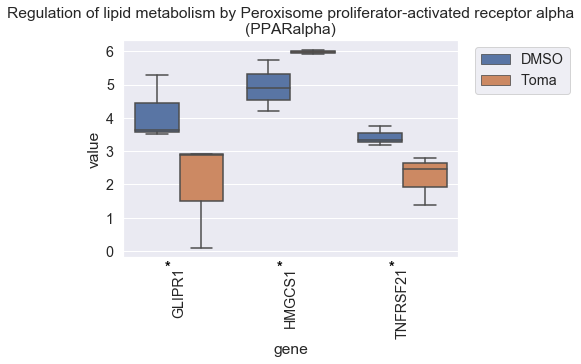

In [46]:
ax = sns.boxplot(data = tt, x = 'gene', y = 'value', hue = 'sample')
ax.set_title('Regulation of lipid metabolism by Peroxisome proliferator-activated receptor alpha\n(PPARalpha)')
plt.xticks(rotation=90)

#add_stat_annotation(ax, data=tt, x='gene', y='value', hue='sample',
#                    box_pairs=[(("BDNF", "Toma"), ("BDNF", "DMSO")),
#                               (("COL4A1", "Toma"), ("COL4A1", "DMSO")),
#                               (("COL4A2", "Toma"), ("COL4A2", "DMSO")),
#                               (("COL6A2", "Toma"), ("COL6A2", "DMSO")),
#                               (("COL6A3", "Toma"), ("COL6A3", "DMSO")),
#                               (("EPHA2", "Toma"), ("EPHA2", "DMSO")),
#                               (("F2R", "Toma"), ("F2R", "DMSO")),
#                               (("FN1", "Toma"), ("FN1", "DMSO")),
#                               (("ITGA1", "Toma"), ("ITGA1", "DMSO")),
#                               (("ITGA2", "Toma"), ("ITGA2", "DMSO")),
#                               (("ITGA4", "Toma"), ("ITGA4", "DMSO")),
#                               (("KIT", "Toma"), ("KIT", "DMSO")),
#                               (("OSMR", "Toma"), ("OSMR", "DMSO")),
#                               (("PDGFB", "Toma"), ("PDGFB", "DMSO"))
#                                ],
#                    test='Wilcoxon', text_format='star', loc='inside', verbose=2)

medians = tt.groupby(['gene'])['value'].median()

for xtick in ax.get_xticks():
    ax.text(xtick-0.1,-0.6, '*', 
            horizontalalignment='center',size='x-large',color='black',weight='semibold')

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))

plt.savefig('./Regulation of lipid metabolism by Peroxisome proliferator-activated receptor alpha (PPARalpha) (Homo sapiens)_box.png', dpi=300, bbox_inches='tight')

---
## Cyclins and Cell Cycle Regulation

In [47]:
#Cyclins and Cell Cycle Regulation
tgfb = ['RB1', 'CCND1', 'CDK4', 'E2F1', 'E2F2', 'E2F3', 'E2F4', 'E2F5', 'CCNE1', 'CDK2', 'CCNE2', 'PPP2CA', 'PPP2CB', 'PPP2R1A', 'PPP2R1B', 'PPP2R2A', 'PPP2R3B', 'CCND2', 'CCND3', 'CDK6', 'CDKN1A', 'CDKN1B', 'CDKN2A', 'CDKN2B', 'CDKN2C', 'CDKN2D', 'TFDP1', 'CDK1', 'CCNH', 'CDK7', 'PPP2R2B', 'PPP2R2C', 'PPP2R3A', 'PTPA', 'PPP2R5A', 'PPP2R5B', 'PPP2R5C', 'PPP2R5E', 'CDKN1C', 'CKS1B', 'MNAT1', 'RBL1', 'RBL2', 'RPS27A', 'SKP1', 'SKP2', 'TFDP2', 'UBA52', 'UBB', 'UBC', 'CUL1', 'ATM', 'ATR', 'CCNA1', 'CCNA2', 'CDC25A', 'LEFTY2', 'GSK3B', 'HDAC1', 'HDAC10', 'HDAC11', 'HDAC2', 'HDAC3', 'HDAC5', 'HDAC6', 'HDAC7', 'HDAC8', 'HDAC9', 'MGC16025', 'TGFB1', 'TGFB2', 'TGFB3', 'TP53', 'BTG1', 'BTG2', 'NOCT', 'CNOT7', 'HOXB9', 'PRMT1', 'CCNB1', 'CCNB2', 'CCNB3', 'MYT1', 'RAF1', 'WEE1']

tgfbdf = df.loc[tgfb]
tgfbdf_h = tgfbdf_h.append(df_h.loc[tgfb])
tgfdf = tgfbdf.dropna().drop_duplicates()

C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  after removing the cwd from sys.path.
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """


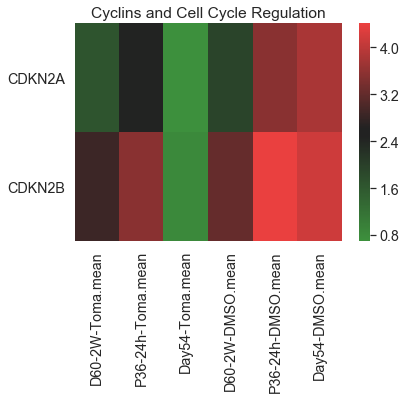

In [48]:
sns.heatmap(tgfdf, cmap=pal).set_title('Cyclins and Cell Cycle Regulation')
plt.yticks(rotation=0)
plt.savefig('./Cyclins and Cell Cycle Regulation.png', dpi=300, bbox_inches='tight')

In [49]:
tt = pd.DataFrame(tgfdf.iloc[:,0].reset_index().iloc[:,1])
tt = tt.rename(columns={'D60-2W-Toma.mean': 'value'})
tt2 = pd.DataFrame(tgfdf.iloc[:,1].reset_index().iloc[:,1])
tt2 = tt2.rename(columns={'P36-24h-Toma.mean': 'value'})
tt = tt.append(tt2)
tt2 = pd.DataFrame(tgfdf.iloc[:,2].reset_index().iloc[:,1])
tt2 = tt2.rename(columns={'Day54-Toma.mean': 'value'})
tt = tt.append(tt2)
tt['sample'] = 'Toma'

td = pd.DataFrame(tgfdf.iloc[:,3].reset_index().iloc[:,1])
td = td.rename(columns={'D60-2W-DMSO.mean': 'value'})
td2 = pd.DataFrame(tgfdf.iloc[:,4].reset_index().iloc[:,1])
td2 = td2.rename(columns={'P36-24h-DMSO.mean': 'value'})
td = td.append(td2)
td2 = pd.DataFrame(tgfdf.iloc[:,5].reset_index().iloc[:,1])
td2 = td2.rename(columns={'Day54-DMSO.mean': 'value'})
td = td.append(td2)
td['sample'] = 'DMSO'


tt = td.append(tt)
tt = tt.reset_index().iloc[:,1:]
tt['gene'] = 'unknown'


k=0
for i in range(0,6):
    for j in range(0,len(tgfdf.index)):
        tt.iloc[k,2] = tgfdf.index[j]
        k=k+1

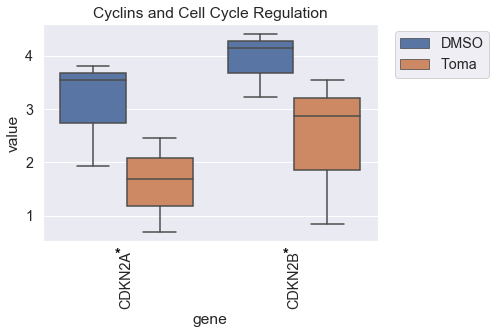

In [50]:
ax = sns.boxplot(data = tt, x = 'gene', y = 'value', hue = 'sample')
ax.set_title('Cyclins and Cell Cycle Regulation')
plt.xticks(rotation=90)

#add_stat_annotation(ax, data=tt, x='gene', y='value', hue='sample',
#                    box_pairs=[(("BDNF", "Toma"), ("BDNF", "DMSO")),
#                               (("COL4A1", "Toma"), ("COL4A1", "DMSO")),
#                               (("COL4A2", "Toma"), ("COL4A2", "DMSO")),
#                               (("COL6A2", "Toma"), ("COL6A2", "DMSO")),
#                               (("COL6A3", "Toma"), ("COL6A3", "DMSO")),
#                               (("EPHA2", "Toma"), ("EPHA2", "DMSO")),
#                               (("F2R", "Toma"), ("F2R", "DMSO")),
#                               (("FN1", "Toma"), ("FN1", "DMSO")),
#                               (("ITGA1", "Toma"), ("ITGA1", "DMSO")),
#                               (("ITGA2", "Toma"), ("ITGA2", "DMSO")),
#                               (("ITGA4", "Toma"), ("ITGA4", "DMSO")),
#                               (("KIT", "Toma"), ("KIT", "DMSO")),
#                               (("OSMR", "Toma"), ("OSMR", "DMSO")),
#                               (("PDGFB", "Toma"), ("PDGFB", "DMSO"))
#                                ],
#                    test='Wilcoxon', text_format='star', loc='inside', verbose=2)

medians = tt.groupby(['gene'])['value'].median()

for xtick in ax.get_xticks():
    ax.text(xtick-0.05,0.2, '*', 
            horizontalalignment='center',size='x-large',color='black',weight='semibold')

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))

plt.savefig('./Cyclins and Cell Cycle Regulation_box.png', dpi=300, bbox_inches='tight')

---
## Cell Cycle: G1/S Check Point

In [51]:
#Cell Cycle: G1/S Check Point
tgfb = ['ABL1', 'ATM', 'ATR', 'CCNA1', 'CCND1', 'CCNE1', 'CDC25A', 'CDK1', 'CDK2', 'CDK4', 'CDK6', 'CDKN1A', 'CDKN1B', 'CDKN2A', 'CDKN2B', 'DHFR', 'E2F1', 'GSK3B', 'HDAC1', 'RB1', 'SKP2', 'SMAD3', 'SMAD4', 'TFDP1', 'TGFB1', 'TP53']

tgfbdf = df.loc[tgfb]
tgfbdf_h = tgfbdf_h.append(df_h.loc[tgfb])
tgfdf = tgfbdf.dropna().drop_duplicates()

C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  after removing the cwd from sys.path.
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """


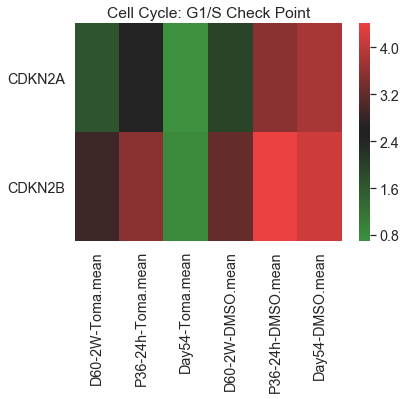

In [52]:
sns.heatmap(tgfdf, cmap=pal).set_title('Cell Cycle: G1/S Check Point')
plt.yticks(rotation=0)
plt.savefig('./Cell Cycle G1S Check Point.png', dpi=300, bbox_inches='tight')

In [53]:
tt = pd.DataFrame(tgfdf.iloc[:,0].reset_index().iloc[:,1])
tt = tt.rename(columns={'D60-2W-Toma.mean': 'value'})
tt2 = pd.DataFrame(tgfdf.iloc[:,1].reset_index().iloc[:,1])
tt2 = tt2.rename(columns={'P36-24h-Toma.mean': 'value'})
tt = tt.append(tt2)
tt2 = pd.DataFrame(tgfdf.iloc[:,2].reset_index().iloc[:,1])
tt2 = tt2.rename(columns={'Day54-Toma.mean': 'value'})
tt = tt.append(tt2)
tt['sample'] = 'Toma'

td = pd.DataFrame(tgfdf.iloc[:,3].reset_index().iloc[:,1])
td = td.rename(columns={'D60-2W-DMSO.mean': 'value'})
td2 = pd.DataFrame(tgfdf.iloc[:,4].reset_index().iloc[:,1])
td2 = td2.rename(columns={'P36-24h-DMSO.mean': 'value'})
td = td.append(td2)
td2 = pd.DataFrame(tgfdf.iloc[:,5].reset_index().iloc[:,1])
td2 = td2.rename(columns={'Day54-DMSO.mean': 'value'})
td = td.append(td2)
td['sample'] = 'DMSO'


tt = td.append(tt)
tt = tt.reset_index().iloc[:,1:]
tt['gene'] = 'unknown'


k=0
for i in range(0,6):
    for j in range(0,len(tgfdf.index)):
        tt.iloc[k,2] = tgfdf.index[j]
        k=k+1

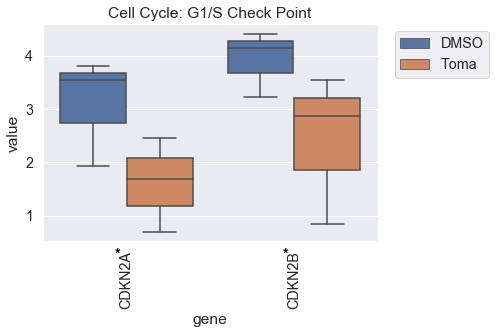

In [54]:
ax = sns.boxplot(data = tt, x = 'gene', y = 'value', hue = 'sample')
ax.set_title('Cell Cycle: G1/S Check Point')
plt.xticks(rotation=90)

#add_stat_annotation(ax, data=tt, x='gene', y='value', hue='sample',
#                    box_pairs=[(("BDNF", "Toma"), ("BDNF", "DMSO")),
#                               (("COL4A1", "Toma"), ("COL4A1", "DMSO")),
#                               (("COL4A2", "Toma"), ("COL4A2", "DMSO")),
#                               (("COL6A2", "Toma"), ("COL6A2", "DMSO")),
#                               (("COL6A3", "Toma"), ("COL6A3", "DMSO")),
#                               (("EPHA2", "Toma"), ("EPHA2", "DMSO")),
#                               (("F2R", "Toma"), ("F2R", "DMSO")),
#                               (("FN1", "Toma"), ("FN1", "DMSO")),
#                               (("ITGA1", "Toma"), ("ITGA1", "DMSO")),
#                               (("ITGA2", "Toma"), ("ITGA2", "DMSO")),
#                               (("ITGA4", "Toma"), ("ITGA4", "DMSO")),
#                               (("KIT", "Toma"), ("KIT", "DMSO")),
#                               (("OSMR", "Toma"), ("OSMR", "DMSO")),
#                               (("PDGFB", "Toma"), ("PDGFB", "DMSO"))
#                                ],
#                    test='Wilcoxon', text_format='star', loc='inside', verbose=2)

medians = tt.groupby(['gene'])['value'].median()

for xtick in ax.get_xticks():
    ax.text(xtick-0.05,0.2, '*', 
            horizontalalignment='center',size='x-large',color='black',weight='semibold')

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))

plt.savefig('./Cell Cycle G1S Check Point_box.png', dpi=300, bbox_inches='tight')

---
## HIF-1-Alpha Transcription Factor Network

In [55]:
#HIF-1-Alpha Transcription Factor Network
tgfb = ['ABCB1', 'ABCG2', 'ADM', 'AKT1', 'ALDOA', 'ARNT', 'BHLHE40', 'BHLHE41', 'BNIP3', 'CA9', 'CITED2', 'COPS5', 'CP', 'CREB1', 'CREBBP', 'CXCL12', 'CXCR4', 'EDN1', 'EGLN1', 'EGLN3', 'ENG', 'ENO1', 'EP300', 'EPO', 'ETS1', 'FECH', 'FOS', 'FURIN', 'GATA2', 'GCK', 'HDAC7', 'HIF1A', 'HK1', 'HK2', 'HMOX1', 'HNF4A', 'ID2', 'IGFBP1', 'ITGB2', 'JUN', 'LDHA', 'LEP', 'MCL1', 'NCOA1', 'NCOA2', 'NDRG1', 'NOS2', 'NPM1', 'NT5E', 'PFKFB3', 'PFKL', 'PGK1', 'PGM1', 'PKM', 'PLIN2', 'SERPINE1', 'SLC2A1', 'SMAD3', 'SMAD4', 'SP1', 'TERT', 'TF', 'TFF3', 'TFRC', 'VEGFA']

tgfbdf = df.loc[tgfb]
tgfbdf_h = tgfbdf_h.append(df_h.loc[tgfb])
tgfdf = tgfbdf.dropna().drop_duplicates()

C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  after removing the cwd from sys.path.
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """


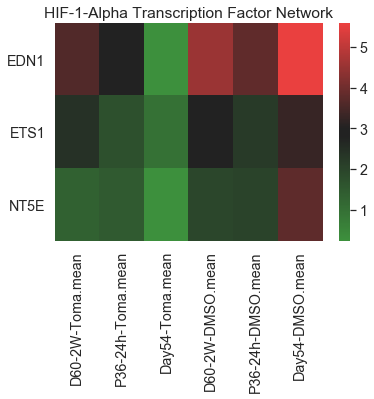

In [56]:
sns.heatmap(tgfdf, cmap=pal).set_title('HIF-1-Alpha Transcription Factor Network')
plt.yticks(rotation=0)
plt.savefig('./HIF-1-Alpha Transcription Factor Network.png', dpi=300, bbox_inches='tight')

In [57]:
tt = pd.DataFrame(tgfdf.iloc[:,0].reset_index().iloc[:,1])
tt = tt.rename(columns={'D60-2W-Toma.mean': 'value'})
tt2 = pd.DataFrame(tgfdf.iloc[:,1].reset_index().iloc[:,1])
tt2 = tt2.rename(columns={'P36-24h-Toma.mean': 'value'})
tt = tt.append(tt2)
tt2 = pd.DataFrame(tgfdf.iloc[:,2].reset_index().iloc[:,1])
tt2 = tt2.rename(columns={'Day54-Toma.mean': 'value'})
tt = tt.append(tt2)
tt['sample'] = 'Toma'

td = pd.DataFrame(tgfdf.iloc[:,3].reset_index().iloc[:,1])
td = td.rename(columns={'D60-2W-DMSO.mean': 'value'})
td2 = pd.DataFrame(tgfdf.iloc[:,4].reset_index().iloc[:,1])
td2 = td2.rename(columns={'P36-24h-DMSO.mean': 'value'})
td = td.append(td2)
td2 = pd.DataFrame(tgfdf.iloc[:,5].reset_index().iloc[:,1])
td2 = td2.rename(columns={'Day54-DMSO.mean': 'value'})
td = td.append(td2)
td['sample'] = 'DMSO'


tt = td.append(tt)
tt = tt.reset_index().iloc[:,1:]
tt['gene'] = 'unknown'


k=0
for i in range(0,6):
    for j in range(0,len(tgfdf.index)):
        tt.iloc[k,2] = tgfdf.index[j]
        k=k+1

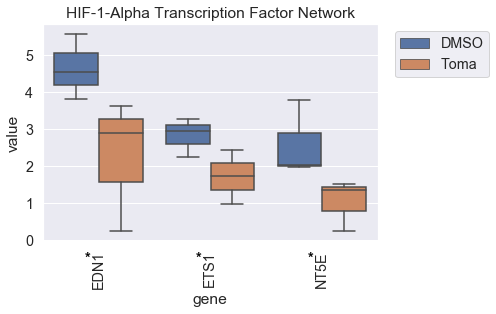

In [58]:
ax = sns.boxplot(data = tt, x = 'gene', y = 'value', hue = 'sample')
ax.set_title('HIF-1-Alpha Transcription Factor Network')
plt.xticks(rotation=90)

#add_stat_annotation(ax, data=tt, x='gene', y='value', hue='sample',
#                    box_pairs=[(("BDNF", "Toma"), ("BDNF", "DMSO")),
#                               (("COL4A1", "Toma"), ("COL4A1", "DMSO")),
#                               (("COL4A2", "Toma"), ("COL4A2", "DMSO")),
#                               (("COL6A2", "Toma"), ("COL6A2", "DMSO")),
#                               (("COL6A3", "Toma"), ("COL6A3", "DMSO")),
#                               (("EPHA2", "Toma"), ("EPHA2", "DMSO")),
#                               (("F2R", "Toma"), ("F2R", "DMSO")),
#                               (("FN1", "Toma"), ("FN1", "DMSO")),
#                               (("ITGA1", "Toma"), ("ITGA1", "DMSO")),
#                               (("ITGA2", "Toma"), ("ITGA2", "DMSO")),
#                               (("ITGA4", "Toma"), ("ITGA4", "DMSO")),
#                               (("KIT", "Toma"), ("KIT", "DMSO")),
#                               (("OSMR", "Toma"), ("OSMR", "DMSO")),
#                               (("PDGFB", "Toma"), ("PDGFB", "DMSO"))
#                                ],
#                    test='Wilcoxon', text_format='star', loc='inside', verbose=2)

medians = tt.groupby(['gene'])['value'].median()

for xtick in ax.get_xticks():
    ax.text(xtick-0.1,-0.6, '*', 
            horizontalalignment='center',size='x-large',color='black',weight='semibold')

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))

plt.savefig('./HIF-1-Alpha Transcription Factor Network_box.png', dpi=300, bbox_inches='tight')

---
## MAPK1/MAPK3 signaling

In [59]:
#MAPK1/MAPK3 signaling
tgfb = ['DUSP8', 'IL6', 'EGF', 'FGF20', 'PSMD7', 'PSMA4', 'RASA2', 'RAPGEF2', 'SPTBN2', 'DUSP2', 'PSMB2', 'PPP2CB', 'SRC', 'PSME4', 'KIT', 'FGFR4', 'FGA', 'ARAF', 'FGF23', 'ARRB1', 'RASGRP4', 'KBTBD7', 'RASAL3', 'DUSP1', 'LAMTOR3', 'GRIN2C', 'NF1', 'PSME1', 'FGF22', 'DUSP9', 'LOC102724229', 'IL5', 'PSMD8', 'TEK', 'SPRED2', 'CALM2', 'IL6R', 'PDGFRB', 'RASA3', 'PEA15', 'FGF5', 'FGF1', 'CALM3', 'FRS3', 'RASGRF1', 'VWF', 'MARK3', 'RBX1', 'KSR1', 'IL3', 'IL5RA', 'SPTA1', 'FGF9', 'IL6ST', 'GFRA1', 'PSMF1', 'PSMC6', 'MAP2K1', 'DAB2IP', 'GRIN1', 'PSMA5', 'RAP1A', 'GFRA3', 'FGF2', 'IQGAP1', 'PSME3', 'PSMD10', 'PSMD2', 'PPP2R5C', 'PSMC5', 'MET', 'PPP2R5B', 'CSK', 'HRAS', 'MAP3K11', 'PDGFA', 'PSMC3', 'PSMD6', 'RASAL2', 'UBC', 'CAMK2G', 'UBA52', 'FGF3', 'PSMB3', 'PSMC4', 'GFRA4', 'ARTN', 'IL2RA', 'PSMB8', 'CSF2', 'GFRA2', 'PSMD12', 'FGF4', 'KRAS', 'MIR5004', 'ACTN2', 'MAPK1', 'PSMD11', 'SHC2', 'PSMA2', 'PTK2', 'RET', 'RANBP9', 'PSMB1', 'GRIN2D', 'GRIN2A', 'PSMB10', 'PPP2CA', 'RAF1', 'ITGA2B', 'PSMA8', 'MIR7855', 'CALM1', 'PTPRA', 'IL17RD', 'KL', 'CUL3', 'DLG4', 'KITLG', 'PHB', 'JAK1', 'PEBP1', 'NRTN', 'CSF2RA', 'PSMD1', 'RASGRF2', 'FGF19', 'IL2RB', 'CNKSR1', 'RPS27A', 'RAP1B', 'IL3RA', 'PSME2', 'NRG2', 'BTC', 'CAMK2D', 'FGF6', 'ERBB2', 'FRS2', 'DUSP10', 'DUSP7', 'CNKSR2', 'NEFL', 'IRS1', 'ERBB4', 'YWHAB', 'GDNF', 'ITGB3', 'ERBB3', 'SHC1', 'RASAL1', 'SEM1', 'APBB1IP', 'SYNGAP1', 'PSMD9', 'FYN', 'FGF10', 'CSF2RB', 'TYK2', 'PSMD4', 'MIR6852', 'IL2', 'IL2RG', 'KLB', 'ARRB2', 'WDR83', 'EREG', 'FGFR3', 'PPP2R5A', 'FGF17', 'PSMD13', 'PSMC1', 'PPP2R1B', 'HGF', 'UBB', 'CAMK2A', 'VCL', 'SPTBN1', 'HBEGF', 'NCAM1', 'PDGFB', 'KSR2', 'PSMB6', 'PSMC2', 'FGF18', 'PSMA7', 'PSPN', 'SPTAN1', 'FGB', 'PSMD14', 'NRG1', 'PDGFRA', 'NRG4', 'RASGRP1', 'CDK1', 'PPP2R1A', 'DUSP6', 'PSMD5', 'PSMB5', 'LAMTOR2', 'RASA4', 'DUSP16', 'FGFR2', 'PSMD3', 'RASGRP3', 'PPP2R5E', 'MAPK3', 'FN1', 'GRIN2B', 'SPTBN5', 'PPP5C', 'EGFR', 'CAMK2B', 'BRAF', 'SPTB', 'PSMB4', 'DUSP4', 'PSMB11', 'PPP2R5D', 'PSMA3', 'PSMB9', 'DUSP5', 'MIR7703', 'JAK2', 'PAQR3', 'PSMA1', 'NRAS', 'GRB2', 'IRS2', 'RASA1', 'FGG', 'SOS1', 'BRAP', 'AKAP9', 'PSMB7', 'ANGPT1', 'FGF8', 'FGF7', 'JAK3', 'SPRED3', 'SHC3', 'LAT', 'FGFR1', 'PTPN11', 'SPTBN4', 'NRG3', 'FGF16', 'TLN1', 'SPRED1', 'RASGEF1A', 'PSMA6', 'MAP2K2']

tgfbdf = df.loc[tgfb]
tgfbdf_h = tgfbdf_h.append(df_h.loc[tgfb])
tgfdf = tgfbdf.dropna().drop_duplicates()

C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  after removing the cwd from sys.path.
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """


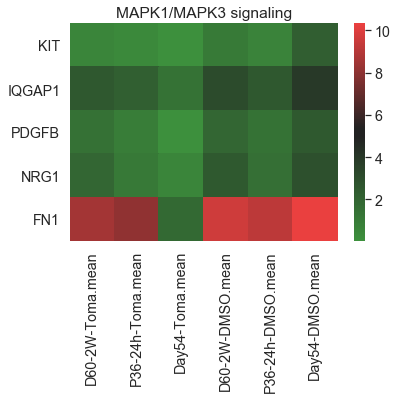

In [60]:
sns.heatmap(tgfdf, cmap=pal).set_title('MAPK1/MAPK3 signaling')
plt.yticks(rotation=0)
plt.savefig('./Homo sapiens (human) MAPK1,MAPK3 signaling.png', dpi=300, bbox_inches='tight')

In [61]:
tt = pd.DataFrame(tgfdf.iloc[:,0].reset_index().iloc[:,1])
tt = tt.rename(columns={'D60-2W-Toma.mean': 'value'})
tt2 = pd.DataFrame(tgfdf.iloc[:,1].reset_index().iloc[:,1])
tt2 = tt2.rename(columns={'P36-24h-Toma.mean': 'value'})
tt = tt.append(tt2)
tt2 = pd.DataFrame(tgfdf.iloc[:,2].reset_index().iloc[:,1])
tt2 = tt2.rename(columns={'Day54-Toma.mean': 'value'})
tt = tt.append(tt2)
tt['sample'] = 'Toma'

td = pd.DataFrame(tgfdf.iloc[:,3].reset_index().iloc[:,1])
td = td.rename(columns={'D60-2W-DMSO.mean': 'value'})
td2 = pd.DataFrame(tgfdf.iloc[:,4].reset_index().iloc[:,1])
td2 = td2.rename(columns={'P36-24h-DMSO.mean': 'value'})
td = td.append(td2)
td2 = pd.DataFrame(tgfdf.iloc[:,5].reset_index().iloc[:,1])
td2 = td2.rename(columns={'Day54-DMSO.mean': 'value'})
td = td.append(td2)
td['sample'] = 'DMSO'


tt = td.append(tt)
tt = tt.reset_index().iloc[:,1:]
tt['gene'] = 'unknown'


k=0
for i in range(0,6):
    for j in range(0,len(tgfdf.index)):
        tt.iloc[k,2] = tgfdf.index[j]
        k=k+1

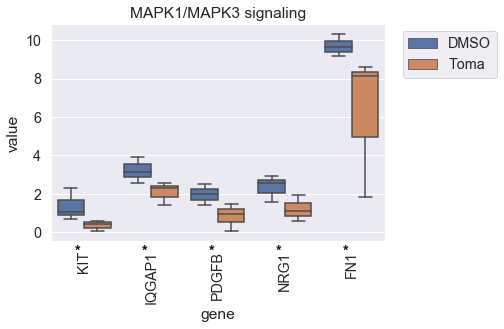

In [62]:
ax = sns.boxplot(data = tt, x = 'gene', y = 'value', hue = 'sample')
ax.set_title('MAPK1/MAPK3 signaling')
plt.xticks(rotation=90)

#add_stat_annotation(ax, data=tt, x='gene', y='value', hue='sample',
#                    box_pairs=[(("BDNF", "Toma"), ("BDNF", "DMSO")),
#                               (("COL4A1", "Toma"), ("COL4A1", "DMSO")),
#                               (("COL4A2", "Toma"), ("COL4A2", "DMSO")),
#                               (("COL6A2", "Toma"), ("COL6A2", "DMSO")),
#                               (("COL6A3", "Toma"), ("COL6A3", "DMSO")),
#                               (("EPHA2", "Toma"), ("EPHA2", "DMSO")),
#                               (("F2R", "Toma"), ("F2R", "DMSO")),
#                               (("FN1", "Toma"), ("FN1", "DMSO")),
#                               (("ITGA1", "Toma"), ("ITGA1", "DMSO")),
#                               (("ITGA2", "Toma"), ("ITGA2", "DMSO")),
#                               (("ITGA4", "Toma"), ("ITGA4", "DMSO")),
#                               (("KIT", "Toma"), ("KIT", "DMSO")),
#                               (("OSMR", "Toma"), ("OSMR", "DMSO")),
#                               (("PDGFB", "Toma"), ("PDGFB", "DMSO"))
#                                ],
#                    test='Wilcoxon', text_format='star', loc='inside', verbose=2)

medians = tt.groupby(['gene'])['value'].median()

for xtick in ax.get_xticks():
    ax.text(xtick-0.1,-1.2, '*', 
            horizontalalignment='center',size='x-large',color='black',weight='semibold')

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))

plt.savefig('./Homo sapiens (human) MAPK1,MAPK3 signaling_box.png', dpi=300, bbox_inches='tight')

---
## Signaling by GPCR

In [63]:
#Signaling by GPCR
tgfb = ['ABR', 'ADCY1', 'ADCY2', 'ADCY3', 'ADCY5', 'ADCY6', 'ADCY7', 'ADCY8', 'ADCY9', 'ADCYAP1', 'ADCYAP1R1', 'ADM', 'ADORA1', 'ADORA2A', 'ADORA2B', 'ADORA3', 'ADRA1D', 'ADRA1B', 'ADRA1A', 'ADRA2A', 'ADRA2B', 'ADRA2C', 'ADRB1', 'ADRB2', 'ADRB3', 'GRK2', 'GRK3', 'AGT', 'AGTR1', 'AGTR2', 'APLNR', 'AKT1', 'AKT2', 'ANXA1', 'APP', 'RHOA', 'RHOB', 'RHOC', 'RHOG', 'ARRB1', 'ARRB2', 'AVP', 'AVPR1A', 'AVPR1B', 'AVPR2', 'OPN1SW', 'BDKRB1', 'BDKRB2', 'CXCR5', 'BRS3', 'C3', 'C3AR1', 'C5', 'C5AR1', 'DAGLA', 'CALCA', 'CALCB', 'CALCR', 'CASR', 'CCK', 'CCKAR', 'CCKBR', 'CDC42', 'CGA', 'CHRM1', 'CHRM2', 'CHRM3', 'CHRM4', 'CHRM5', 'CCR1', 'CCR3', 'CCR4', 'CCR5', 'CCR6', 'CCR7', 'CCR8', 'LTB4R', 'CNR1', 'CNR2', 'CORT', 'CRH', 'CRHR1', 'CRHR2', 'CSF2', 'CSF2RA', 'CSF2RB', 'DGKA', 'DGKB', 'DGKG', 'DGKQ', 'DRD1', 'DRD2', 'DRD3', 'DRD4', 'DRD5', 'ECT2', 'S1PR1', 'LPAR1', 'S1PR3', 'EDN1', 'EDN2', 'EDN3', 'EDNRA', 'EDNRB', 'F2', 'F2R', 'F2RL1', 'F2RL2', 'FGD1', 'FPR1', 'FPR2', 'FPR3', 'FSHB', 'FSHR', 'GAST', 'GABBR1', 'GALR1', 'GCG', 'GCGR', 'OPN1MW', 'GHRH', 'GHRHR', 'GHSR', 'GIP', 'GIPR', 'GLP1R', 'GNA11', 'GNA12', 'GNA15', 'GNAI1', 'GNAI2', 'GNAI3', 'GNAL', 'GNAQ', 'GNAS', 'GNAT1', 'GNAT2', 'GNAZ', 'GNB1', 'GNB2', 'GNB3', 'GNG3', 'GNG4', 'GNG5', 'GNG7', 'GNG10', 'GNG11', 'GNGT1', 'GNGT2', 'GNRH1', 'GNRH2', 'GNRHR', 'CCR10', 'GPR4', 'XCR1', 'NPBWR1', 'NPBWR2', 'CXCR3', 'UTS2R', 'GPR15', 'GPR17', 'GPR18', 'GPR20', 'LPAR4', 'MCHR1', 'GPR25', 'GPR27', 'GPER1', 'GPR32', 'MLNR', 'FFAR1', 'FFAR3', 'FFAR2', 'GRK5', 'GRK6', 'GRB2', 'GRM1', 'GRM2', 'GRM3', 'GRM4', 'GRM5', 'GRM6', 'GRM7', 'GRM8', 'CXCL1', 'CXCL2', 'CXCL3', 'GRP', 'GRPR', 'HCRT', 'HCRTR1', 'HCRTR2', 'HRH1', 'HRH2', 'HTR1A', 'HTR1B', 'HTR1D', 'HTR1E', 'HTR1F', 'HTR2A', 'HTR2B', 'HTR2C', 'HTR4', 'HTR5A', 'HTR6', 'HTR7', 'IAPP', 'IL2', 'IL2RA', 'IL2RB', 'IL2RG', 'IL3', 'IL3RA', 'IL5', 'IL5RA', 'CXCL8', 'CXCR1', 'CXCR2', 'CXCL10', 'INSL3', 'ITPR1', 'ITPR2', 'ITPR3', 'JAK1', 'JAK2', 'JAK3', 'KISS1', 'KNG1', 'LHB', 'LHCGR', 'MC1R', 'MC2R', 'MC3R', 'MC4R', 'MC5R', 'MCF2', 'CXCL9', 'MLN', 'MTNR1A', 'MTNR1B', 'NMB', 'NMBR', 'NPY', 'NPY1R', 'NPY2R', 'NPY5R', 'NTS', 'NTSR1', 'OPRD1', 'OPRK1', 'OPRL1', 'OPRM1', 'OR1D2', 'OR1F1', 'OR2C1', 'OR3A1', 'OR3A2', 'OXT', 'OXTR', 'P2RY1', 'P2RY2', 'P2RY4', 'P2RY6', 'P2RY11', 'PDE1A', 'PDE2A', 'PDE3A', 'PDE3B', 'PDE4A', 'PDE4B', 'PDE4C', 'PDE4D', 'PDE7A', 'PDE8A', 'PDE1B', 'PDPK1', 'PDYN', 'PENK', 'PF4', 'PIK3CA', 'PIK3CB', 'PIK3CD', 'PIK3CG', 'PIK3R1', 'PIK3R2', 'PLCB2', 'PLCB3', 'PLCB4', 'PLXNB1', 'PMCH', 'PNOC', 'POMC', 'PPBP', 'PPY', 'NPY4R', 'PRKCA', 'PRKCB', 'PRKCD', 'PRKCE', 'PRKCG', 'PRKCH', 'PRKCQ', 'PYY', 'PTAFR', 'TAS2R38', 'PTGDR', 'PTGER1', 'PTGER2', 'PTGER3', 'PTGER4', 'PTGFR', 'PTGIR', 'PTH', 'PTHLH', 'PTH1R', 'PTH2R', 'RAC1', 'RAC2', 'RASGRF2', 'OPN1LW', 'RGR', 'RGS1', 'RGS2', 'RGS3', 'RGS4', 'RGS7', 'RGS10', 'RGS12', 'RGS13', 'RGS16', 'RHO', 'RLN2', 'ROCK1', 'SAA1', 'SCT', 'SCTR', 'CCL5', 'CCL16', 'CCL19', 'CCL20', 'CCL21', 'CCL23', 'CCL25', 'CXCL6', 'CXCL11', 'CXCL5', 'XCL1', 'CXCL12', 'ITSN1', 'SHC1', 'SOS1', 'SOS2', 'SST', 'SSTR1', 'SSTR2', 'SSTR3', 'SSTR4', 'SSTR5', 'XCL2', 'TAC1', 'TACR2', 'TAC3', 'TACR1', 'TACR3', 'TBXA2R', 'TIAM1', 'TRH', 'TRHR', 'TRIO', 'TRPC3', 'TRPC6', 'TSHB', 'TSHR', 'VAV1', 'VAV2', 'VIP', 'VIPR1', 'VIPR2', 'CXCR4', 'REEP5', 'OR2H2', 'ARHGEF5', 'GPR68', 'OR1A1', 'OR1D5', 'OR1E1', 'OR1E2', 'OR1E3', 'OR1G1', 'OR1P1', 'OR3A3', 'GPR65', 'GALR3', 'RGS5', 'PIK3R3', 'DGKZ', 'DGKE', 'DGKD', 'OR6A2', 'RGS20', 'NPFF', 'PDE8B', 'S1PR4', 'RGS11', 'RGS9', 'GALR2', 'HCAR3', 'APLN', 'ARHGEF7', 'KALRN', 'F2RL3', 'TAAR5', 'ARHGEF1', 'DGKI', 'LPAR2', 'ARHGEF2', 'TAAR2', 'TAAR3P', 'GPR55', 'S1PR2', 'GLP2R', 'ARHGEF6', 'ROCK2', 'GABBR2', 'RGS6', 'GNA14', 'ARHGEF10', 'ARHGEF11', 'ARHGEF17', 'GAB2', 'P2RY14', 'AKT3', 'INSL5', 'RASGRP1', 'LPAR6', 'CALCRL', 'RASGRP2', 'RAMP2', 'RAMP1', 'RAMP3', 'NET1', 'RGS19', 'NMUR1', 'VAV3', 'CXCL13', 'RGS14', 'CXCR6', 'GNA13', 'GNB5', 'RRH', 'OR5I1', 'CYSLTR1', 'CCR9', 'PDE10A', 'CCL27', 'NMU', 'NPFFR2', 'PROKR1', 'GPR83', 'UTS2', 'AKAP13', 'GPR176', 'GPR45', 'PTGDR2', 'HRH3', 'MGLL', 'ARHGEF15', 'ARHGEF9', 'PLCB1', 'MCF2L', 'ARHGEF12', 'ARHGEF18', 'PIK3R5', 'OR52A1', 'LPAR3', 'OPN3', 'NTSR2', 'NGEF', 'ARHGEF26', 'GPSM1', 'ABHD12', 'RGS22', 'OR1F2P', 'OR1C1', 'OR1A2', 'OR2F1', 'OR2B6', 'OR1J4', 'TIAM2', 'OR2M4', 'OR2L2', 'OR2K2', 'OR7A17', 'OR5L2', 'OR5K1', 'OR5H1', 'OR10J1', 'OR8G2P', 'OR8B8', 'OR8G1', 'OR9A1P', 'OR10A3', 'OR10D3', 'OR12D2', 'OR11A1', 'OR10H3', 'OR10G3', 'OR10G2', 'OR10H2', 'OR10H1', 'RGS17', 'OR8B2', 'OR7E24', 'OR7C2', 'OR7A5', 'OR7C1', 'OR4F4', 'OR4F3', 'OR4E2', 'OR4E1', 'OR4D1', 'OR2W1', 'OR2V1', 'OR2T1', 'OR2J2', 'OR2H1', 'OR1L3', 'OR1L1', 'OR1J2', 'PDE7B', 'HCAR1', 'OXGR1', 'ARHGEF16', 'P2RY10', 'GPR132', 'ARHGEF4', 'ARHGEF3', 'TAS2R3', 'TAS2R4', 'TAS2R16', 'TAS2R1', 'TAS2R9', 'TAS2R8', 'TAS2R7', 'TAS2R13', 'TAS2R10', 'TAS2R14', 'HEBP1', 'PDE11A', 'GAL', 'RXFP3', 'REEP2', 'GHRL', 'GNG13', 'S1PR5', 'P2RY13', 'GPR84', 'GNG2', 'TAS2R5', 'ARHGEF38', 'ARHGEF10L', 'ARHGEF40', 'GNG12', 'LTB4R2', 'CCL28', 'OR2S2', 'SUCNR1', 'NMUR2', 'ACKR3', 'CYSLTR2', 'TRPC7', 'LPAR5', 'ABHD6', 'PLEKHG5', 'PREX1', 'CXCL16', 'HRH4', 'GNB4', 'RXFP1', 'PROK2', 'NPFFR1', 'RTP4', 'RGS18', 'P2RY12', 'PLEKHG2', 'REEP1', 'OR2B8P', 'OR52L2P', 'OR13A1', 'OR5H6', 'OR52E1', 'OR5H2', 'OR4K5', 'OR51G1', 'OR11H2', 'OR51B4', 'OR51B2', 'OR4C5', 'OR51J1', 'OR52N1', 'OR5AL1', 'OR10G6', 'OR4F5', 'OR2A4', 'OR4K1', 'OR6J1', 'ADM2', 'REEP4', 'OR5AC2', 'OR11H1', 'OR4F17', 'OR4K15', 'OR8J3', 'OR8J2', 'OR5G3', 'OR5AK3P', 'OR52P1P', 'OR51G2', 'OR51E2', 'OR4P4', 'OR4C15', 'OR4A8', 'OR4A5', 'OR4A16', 'OR4A15', 'OR10W1', 'OR2AE1', 'OR4F16', 'OR2W6P', 'OR5AC1', 'OR6N2', 'OR6K2', 'OR2T7', 'OR2L5', 'OR2G3', 'OR2G2', 'OR2C3', 'OR5V1', 'OR2B2', 'OR12D3', 'TAAR8', 'RTP3', 'OBSCN', 'QRFPR', 'PROK1', 'MCHR2', 'KISS1R', 'ARHGEF39', 'RGS8', 'FGD3', 'REEP6', 'OPN4', 'GNG8', 'PTH2', 'GNRHR2', 'ARHGEF25', 'RLN3', 'OR52E2', 'OR52J3', 'OR51L1', 'OR51A7', 'OR51S1', 'OR51F2', 'OR52R1', 'OR4C46', 'OR4X2', 'OR4B1', 'OR52M1', 'OR52K2', 'OR5P2', 'OR5P3', 'OR8I2', 'OR2D3', 'OR2D2', 'OR52W1', 'OR56A4', 'OR56A1', 'OR2AP1', 'OR10P1', 'OR10AD1', 'OR10A7', 'FGD4', 'RXFP2', 'OR4K14', 'OR4L1', 'OR11H6', 'GPHB5', 'OR4D2', 'OR7D4', 'OR7G1', 'OR1M1', 'OR1I1', 'OR10H4', 'OR2M5', 'OR2M3', 'OR2T12', 'OR14C36', 'OR2T34', 'OR2T10', 'OR2T4', 'OR2T11', 'OR10J5', 'OR2AJ1', 'OR14L1P', 'OR2B11', 'ARHGEF19', 'OR10T2', 'OR6P1', 'OR10X1', 'OR10Z1', 'OR6K6', 'OR6N1', 'PROKR2', 'NMS', 'OR9A4', 'RTP1', 'OR2Y1', 'TAAR9', 'TAAR1', 'OR9A2', 'OR2A14', 'OR6B1', 'OR2F2', 'OR13C5', 'OR13C8', 'OR13C3', 'OR13C4', 'OR13F1', 'OR1L8', 'OR1N2', 'OR1N1', 'DGKK', 'OR52I2', 'OR51E1', 'OR10A5', 'OR2AG1', 'PIK3R6', 'OR6B3', 'GPBAR1', 'OR1Q1', 'DGKH', 'OR7D2', 'OXER1', 'GPHA2', 'OR56B4', 'ADCY4', 'OR8U1', 'OR4C16', 'OR4C11', 'OR4S2', 'OR4C6', 'OR5D14', 'OR5L1', 'OR5D18', 'OR5AS1', 'OR8K5', 'OR5T2', 'OR8H1', 'OR8K3', 'OR8J1', 'OR5R1', 'OR5M3', 'OR5M8', 'OR5M11', 'OR5AR1', 'OR8B12', 'OR8G5', 'OR10G8', 'OR10G9', 'OR10S1', 'OR6T1', 'OR4D5', 'OR6Q1', 'OR9I1', 'OR9Q1', 'OR9Q2', 'OR1S2', 'OR1S1', 'OR10Q1', 'OR5B17', 'OR5B21', 'OR5A2', 'OR5A1', 'OR4D6', 'OR4D11', 'REEP3', 'OPN5', 'FGD2', 'DAGLB', 'GPRC6A', 'OR6C74', 'OR6C3', 'OR2T6', 'OR1L4', 'OR52B2', 'OR4C3', 'OR4S1', 'OR51F1', 'NPB', 'UTS2B', 'TAS2R39', 'TAS2R40', 'TAS2R41', 'TAS2R43', 'TAS2R31', 'TAS2R45', 'TAS2R46', 'TAS2R30', 'TAS2R19', 'TAS2R20', 'TAS2R50', 'OR51B5', 'OR10AG1', 'OR5J2', 'OR4C13', 'OR4C12', 'OR52Z1', 'OR51V1', 'OR8D1', 'OR8D2', 'OR8B4', 'OR9G4', 'OR10A4', 'OR6C6', 'OR4K3', 'OR4N4', 'NPW', 'OR2Z1', 'OR10H5', 'OR2L13', 'OR14A16', 'RTP5', 'GPR150', 'OR2V2', 'OR13C9', 'OR13D1', 'TAAR6', 'TAS2R60', 'HCAR2', 'OR8D4', 'OR5F1', 'OR5AP2', 'OR52L1', 'OR2AG2', 'RXFP4', 'OR52B6', 'OR2AT4', 'OR10A2', 'OR6C2', 'OR6C4', 'OR8S1', 'OR6S1', 'OR6F1', 'OR2W3', 'OR2T8', 'OR2T3', 'OR10R2', 'OR2T29', 'RTP2', 'OR6V1', 'OR2A12', 'OR2A1', 'GNAT3', 'QRFP', 'OR1J1', 'OR1B1', 'OR13H1', 'TAS2R42', 'RGSL1', 'NPSR1', 'OR56B1', 'OR14A2', 'OR6B2', 'ARHGEF37', 'OR52K1', 'OR52I1', 'OR51D1', 'OR52A4P', 'OR52A5', 'OR51B6', 'OR51M1', 'OR51Q1', 'OR51I1', 'OR51I2', 'OR52D1', 'OR52H1', 'OR52N4', 'OR56B2P', 'OR52N5', 'OR52N2', 'OR52E6', 'OR52E8', 'OR52E4', 'OR52E5', 'OR56A3', 'OR56A5', 'OR10A6', 'OR4X1', 'OR4A4P', 'OR5D13', 'OR5D16', 'OR5W2', 'OR8H2', 'OR8H3', 'OR5T3', 'OR5T1', 'OR8K1', 'OR5M9', 'OR5M10', 'OR5M1', 'OR9G1', 'OR5AK2', 'OR5B2', 'OR5B12', 'OR5AN1', 'OR4D10', 'OR4D9', 'OR10V1', 'OR6X1', 'OR6M1', 'OR10G4', 'OR10G7', 'OR10D4P', 'OR8B3', 'OR8A1', 'OR6C1', 'OR6C75', 'OR6C76', 'OR6C70', 'OR4N2', 'OR4K2', 'OR4Q2', 'OR4K13', 'OR4K17', 'OR4N5', 'OR11G2', 'OR11H7', 'OR11H4', 'OR5AU1', 'OR4M2', 'OR4F6', 'OR4F15', 'OR7G2', 'OR7G3', 'OR7A10', 'OR7A2P', 'OR10K2', 'OR10K1', 'OR6Y1', 'OR6K3', 'OR10J4', 'OR11L1', 'OR2L8', 'OR2AK2', 'OR2L3', 'OR2M2', 'OR2T33', 'OR2M7', 'OR2G6', 'OR10AC1', 'OR2A25', 'OR13J1', 'OR13C2', 'OR1L6', 'OR5C1', 'OR1K1', 'OR2A5', 'OR2A7', 'OR51H1', 'OR51T1', 'OR51A4', 'OR51A2', 'OR10J6P', 'OR2T2', 'OR2T5', 'OR14I1', 'OR5K2', 'OR2A42', 'OR2T27', 'OR2T35', 'OR4A47', 'OR4C45', 'OR5H14', 'OR5H15', 'OR5K3', 'OR5K4', 'OR6C65', 'OR6C68', 'MIR197', 'RGS21', 'OR4F21', 'OR5B3', 'OR9K2', 'OR4Q3', 'OR4M1', 'OR10J3', 'OR2W5', 'OR13G1', 'OR1F12', 'OR2B3', 'OR2J1', 'OR2J3', 'OR14J1', 'OR10C1', 'OR2I1P', 'OR2A2', 'ARHGEF35', 'OR8U8', 'OR8U9', 'OR9G9', 'NPS', 'OR1D4', 'CCR2', 'OR4F29', 'LOC729966', 'ARHGEF33', 'LOC100505585', 'MIR7706', 'LOC105369274', 'LOC107987545', 'ACTN2', 'ANGPT1', 'ARAF', 'BRAF', 'BTC', 'CALM1', 'CALM2', 'CALM3', 'CAMK4', 'CAMK2A', 'CAMK2B', 'CAMK2D', 'CAMK2G', 'ADGRE5', 'CDK5', 'CREB1', 'CRHBP', 'CSK', 'CX3CR1', 'CD55', 'DLG4', 'HBEGF', 'DUSP1', 'DUSP2', 'DUSP4', 'DUSP5', 'DUSP6', 'DUSP7', 'DUSP8', 'DUSP9', 'GPR183', 'ECE1', 'EGF', 'EGFR', 'ADGRE1', 'ERBB2', 'ERBB3', 'ERBB4', 'EREG', 'FGA', 'FGB', 'FGF1', 'FGF2', 'FGF3', 'FGF4', 'FGF5', 'FGF6', 'FGF7', 'FGF8', 'FGF9', 'FGF10', 'FGFR1', 'FGFR3', 'FGFR2', 'FGFR4', 'FGG', 'FN1', 'ACKR1', 'FYN', 'FZD2', 'GDNF', 'GFRA1', 'GFRA2', 'GFRA3', 'GNAO1', 'PRLHR', 'GPR31', 'GPR35', 'GPR37', 'GPR39', 'GRIN1', 'GRIN2A', 'GRIN2B', 'GRIN2C', 'GRIN2D', 'HGF', 'NRG1', 'HRAS', 'IHH', 'IRS1', 'ITGA2B', 'ITGB3', 'KEL', 'KIT', 'KRAS', 'MARK3', 'MET', 'KITLG', 'MAP3K11', 'MMP3', 'NCAM1', 'NEFL', 'NF1', 'NRAS', 'NRTN', 'GPR143', 'PEBP1', 'PDE1C', 'PDGFA', 'PDGFB', 'PDGFRA', 'PDGFRB', 'PHB', 'PLA2G4A', 'PPP1CA', 'PPP2CA', 'PPP2CB', 'PPP2R1A', 'PPP2R1B', 'PPP2R5A', 'PPP2R5B', 'PPP2R5C', 'PPP2R5D', 'PPP2R5E', 'PPP3CA', 'PPP3CB', 'PPP3CC', 'PPP3R1', 'PPP5C', 'PRKACA', 'PRKACB', 'PRKACG', 'PRKAR1A', 'PRKAR1B', 'PRKAR2A', 'PRKAR2B', 'MAPK1', 'MAPK3', 'MAPK7', 'MAP2K1', 'MAP2K2', 'PSPN', 'PSAP', 'PSMA1', 'PSMA2', 'PSMA3', 'PSMA4', 'PSMA5', 'PSMA6', 'PSMA7', 'PSMB1', 'PSMB2', 'PSMB3', 'PSMB4', 'PSMB5', 'PSMB6', 'PSMB7', 'PSMB8', 'PSMB9', 'PSMB10', 'PSMC1', 'PSMC2', 'PSMC3', 'PSMC4', 'PSMC5', 'PSMC6', 'PSMD1', 'PSMD2', 'PSMD3', 'PSMD4', 'PSMD5', 'PSMD7', 'PSMD8', 'PSMD9', 'PSMD10', 'PSMD11', 'PSMD12', 'PSMD13', 'PSME1', 'PSME2', 'PTCH1', 'PTK2', 'PTPRA', 'RAF1', 'RAP1A', 'RAP1B', 'RASA1', 'RASA2', 'RASGRF1', 'RET', 'RPS6KA1', 'RPS6KA2', 'RPS6KA3', 'RPS27A', 'CCL1', 'CCL13', 'CX3CL1', 'SHH', 'SMO', 'SPTA1', 'SPTAN1', 'SPTB', 'SPTBN1', 'SPTBN2', 'SRC', 'TEK', 'TLN1', 'UBA52', 'UBB', 'UBC', 'UCN', 'VCL', 'VWF', 'WNT1', 'WNT2', 'WNT3', 'WNT5A', 'WNT6', 'WNT7A', 'WNT7B', 'WNT8A', 'WNT8B', 'WNT10B', 'WNT11', 'WNT2B', 'WNT9A', 'WNT9B', 'XK', 'YWHAB', 'FZD5', 'FZD3', 'SEM1', 'FGF23', 'BRAP', 'FZD1', 'FZD4', 'FZD6', 'FZD7', 'FZD8', 'FZD9', 'RASAL1', 'CUL3', 'PTCH2', 'LAMTOR3', 'IRS2', 'PEA15', 'FGF18', 'FGF17', 'FGF16', 'IQGAP1', 'SYNGAP1', 'KSR1', 'CCRL2', 'ARTN', 'GPR37L1', 'KL', 'RASAL2', 'PSMF1', 'NRG2', 'RAPGEF2', 'ECE2', 'PSMD6', 'PLPPR4', 'FGF19', 'RBX1', 'RANBP9', 'AKAP9', 'RASA4', 'PSME3', 'PSMD14', 'CNKSR1', 'NRG3', 'AHCYL1', 'FRS3', 'FRS2', 'FZD10', 'DUSP10', 'RASA3', 'CNKSR2', 'PSME4', 'SHC2', 'RASGRP3', 'FGF20', 'FGF22', 'LAT', 'C5AR2', 'LAMTOR2', 'ADGRE2', 'DHH', 'PRLH', 'SPTBN5', 'WNT16', 'ACKR4', 'SHC3', 'WNT4', 'APBB1IP', 'IL17RD', 'PLPPR1', 'NLN', 'SPTBN4', 'GFRA4', 'PLPPR2', 'RASAL3', 'PLPPR3', 'WNT10A', 'DUSP16', 'TAS1R2', 'TAS1R1', 'TAS1R3', 'KBTBD7', 'PPP1R1B', 'WDR83', 'ADGRE3', 'WNT3A', 'UCN2', 'UCN3', 'RASGRP4', 'PSMB11', 'PSMA8', 'NRG4', 'PAQR3', 'KLB', 'DAB2IP', 'SPRED1', 'PLPPR5', 'SPRED2', 'RASGEF1A', 'KSR2', 'FFAR4', 'SPRED3', 'MIR4683', 'MIR5004', 'LOC101929777', 'MIR6852', 'MIR7703', 'MIR7855', 'A2M', 'ABCA4', 'ABL1', 'ACTB', 'ACTG1', 'ACVR1B', 'ACVR2A', 'ACVR2B', 'ADAM10', 'ADH1A', 'ADH1C', 'ADH4', 'PARP1', 'AP2A1', 'AP2A2', 'AP2B1', 'TLE5', 'JAG1', 'ALDH1A1', 'ALDH1A3', 'APC', 'BIRC2', 'BIRC3', 'XIAP', 'BIRC5', 'APOA1', 'APOA2', 'APOA4', 'APOB', 'APOC2', 'APOC3', 'APOE', 'KLK3', 'FAS', 'FASLG', 'AR', 'ARF6', 'ARHGAP1', 'ARHGAP4', 'ARHGAP5', 'ARHGAP6', 'ARHGDIA', 'ARHGDIB', 'ARHGDIG', 'RHOH', 'ATF1', 'ATP2A1', 'ATP2A2', 'ATP2A3', 'ATP6V1A', 'ATP6V1B1', 'ATP6V1B2', 'ATP6V0C', 'ATP6V1C1', 'ATP6V1E1', 'ATP6V0B', 'ATP6V1G2', 'ATP6V0A1', 'ATP6AP1', 'AXL', 'BAD', 'CCND1', 'BCL9', 'BCR', 'BMP2', 'BMPR1A', 'BMPR1B', 'BMPR2', 'BTK', 'BUB1', 'BUB1B', 'FMNL1', 'CASP2', 'CASP3', 'CASP8', 'CASP9', 'CASP10', 'CAV1', 'CBL', 'CCNC', 'CCND3', 'CCNE1', 'CCNT1', 'CCNT2', 'CD19', 'CD28', 'CD80', 'CD86', 'CDK1', 'SEPTIN7', 'CDC20', 'CDC25C', 'CDH1', 'CDH5', 'CDK2', 'CDK4', 'CDK8', 'CDK9', 'CDKN1A', 'CDKN1B', 'CDKN2B', 'CENPA', 'CENPC', 'CENPE', 'CENPF', 'CFTR', 'AKR1C4', 'CHEK1', 'CHN1', 'CHN2', 'CHUK', 'AP2M1', 'AP2S1', 'CLPS', 'CLTA', 'CLTB', 'CLTC', 'CMA1', 'CNGB1', 'CNGA1', 'CNTN1', 'COL4A1', 'COL4A2', 'COL4A3', 'COL4A4', 'COL4A5', 'COL6A1', 'COL6A2', 'COL6A3', 'COL9A1', 'COL9A2', 'COL9A3', 'CPT1A', 'CPT1B', 'CRABP1', 'CRABP2', 'CREBBP', 'CRK', 'CRKL', 'MAPK14', 'CSN2', 'CSNK1A1', 'CSNK1E', 'CSNK1G2', 'CSNK2A1', 'CSNK2A2', 'CSNK2B', 'CTBP1', 'CTBP2', 'CTNNA1', 'CTNNB1', 'CTNND1', 'CYBA', 'CYBB', 'CYLD', 'CYP26A1', 'AKR1C1', 'DIAPH1', 'DIAPH2', 'DLAT', 'DLD', 'DNM1', 'DNM2', 'DOCK1', 'DOK1', 'DTX1', 'DUSP3', 'DVL1', 'DVL2', 'DVL3', 'E2F1', 'E2F3', 'E2F4', 'E2F5', 'EIF4B', 'EIF4E', 'EIF4EBP1', 'EIF4G1', 'ELK1', 'CTTN', 'EP300', 'EPAS1', 'EPS15', 'ESR1', 'ETV4', 'EVC', 'FABP5', 'PTK2B', 'FCER2', 'GPC4', 'FER', 'FES', 'GPC5', 'VEGFD', 'FKBP1A', 'FOXO1', 'FOXO3', 'FLNA', 'FLT1', 'FLT4', 'FNTA', 'FNTB', 'MTOR', 'CENPI', 'GAB1', 'GALNT3', 'GAS1', 'GAS8', 'KAT2A', 'GDI1', 'GDI2', 'GFAP', 'B4GALT1', 'GPC3', 'GLI1', 'GLI2', 'GLI3', 'SFN', 'GPC1', 'GRK4', 'GRB7', 'GRB10', 'RAPGEF1', 'NR3C1', 'ARHGAP35', 'GSK3A', 'GSK3B', 'GTF2F1', 'GTF2F2', 'GUCA1A', 'GUCA1B', 'GUCY2F', 'GUCY2D', 'GZMB', 'H2AC8', 'H2AC7', 'H2AX', 'H2AZ1', 'H2BC5', 'H2BC3', 'H3-3A', 'H3-3B', 'HDAC1', 'HDAC2', 'NCKAP1L', 'HGFAC', 'HIF1A', 'NR4A1', 'HNRNPA1', 'HNRNPF', 'HNRNPH1', 'HPN', 'HES1', 'HSD17B1', 'HSPB1', 'HSP90AA1', 'DNAJB1', 'HSPG2', 'IGF1', 'IGF1R', 'IGF2', 'RBPJ', 'IKBKB', 'IL6', 'IL6R', 'IL6ST', 'INCENP', 'INHBA', 'INHBB', 'INS', 'INPP5B', 'INSR', 'IRAK1', 'ITGA2', 'ITGA3', 'ITGAV', 'ITGB1', 'JAG2', 'JUN', 'JUNB', 'JUP', 'ANOS1', 'KDR', 'KIF2A', 'KIF5A', 'KIF5B', 'KLK2', 'KLC1', 'KTN1', 'LAMA2', 'LAMA3', 'LAMA4', 'LAMA5', 'LAMB1', 'LAMB2', 'LAMB3', 'LAMC1', 'LAMC2', 'LCK', 'LDLR', 'LEP', 'LEPR', 'LFNG', 'LIMK1', 'LIMK2', 'LPL', 'LRP1', 'LRP2', 'LRP6', 'LRP5', 'LYN', 'MAD2L1', 'SMAD1', 'SMAD2', 'SMAD3', 'SMAD4', 'SMAD5', 'SMAD6', 'SMAD7', 'SMAD9', 'MAG', 'MATK', 'MDK', 'MDM2', 'MEF2A', 'MEF2C', 'MEN1', 'MFNG', 'FOXO4', 'MMP9', 'MOV10', 'MST1', 'MST1R', 'MYC', 'MYD88', 'MYH9', 'MYH10', 'MYH11', 'MYL6', 'MYLK', 'MYO7A', 'MYO9A', 'MYO9B', 'PPP1R12A', 'PPP1R12B', 'HNRNPM', 'NCBP1', 'NCF2', 'NCF4', 'NCK1', 'NEDD4', 'NEDD8', 'NF2', 'NFATC1', 'NFKB1', 'NFKBIA', 'NGF', 'NGFR', 'NMT1', 'NOS3', 'NOTCH1', 'NOTCH2', 'NOTCH3', 'NOTCH4', 'NTRK1', 'NTRK2', 'ROR1', 'ROR2', 'NUP98', 'OCRL', 'OMG', 'OPHN1', 'P4HB', 'FURIN', 'PCSK6', 'PAFAH1B1', 'SERPINE1', 'PAK1', 'PAK2', 'PAK3', 'PCSK5', 'PDE6A', 'PDE6G', 'PDE6B', 'PDHA1', 'PDHB', 'PDK1', 'PDK2', 'PDK3', 'PDK4', 'PFN1', 'PFN2', 'PGF', 'PGR', 'PIK3C3', 'PIP4K2A', 'PLAT', 'PLCG1', 'PLG', 'PLK1', 'PNLIP', 'POLR2A', 'POLR2B', 'POLR2C', 'POLR2D', 'POLR2E', 'POLR2F', 'POLR2G', 'POLR2H', 'POLR2I', 'POLR2J', 'POLR2K', 'POLR2L', 'PPARD', 'PPEF1', 'PPM1A', 'PPP1CB', 'PPP1CC', 'PRKAA1', 'PRKAA2', 'PRKAB1', 'PRKAB2', 'PRKAG1', 'PRKCI', 'PKN1', 'PKN2', 'PRKCZ', 'PRKG1', 'PRKG2', 'MAPK4', 'MAPK6', 'MAPK8', 'MAPK11', 'MAPK13', 'MAP2K5', 'PSEN2', 'PTBP1', 'PTEN', 'PTK6', 'PTPN1', 'PTPN2', 'PTPN3', 'PTPN6', 'PTPN11', 'PTPN12', 'PTPRJ', 'PTPRK', 'PXN', 'RAB4A', 'RAB6A', 'RAC3', 'RAG1', 'RAG2', 'RALA', 'RALB', 'RALGDS', 'RANBP2', 'RANGAP1', 'RARA', 'RARB', 'RARG', 'RBBP5', 'RBL1', 'RBP1', 'RBP2', 'RBP3', 'RBP4', 'RCVRN', 'RDH5', 'RELA', 'RFNG', 'RHEB', 'GRK1', 'RIT2', 'RIT1', 'RLBP1', 'RPE65', 'RPS6', 'RPS6KB1', 'RPS6KB2', 'RPS27', 'RTKN', 'CLIP1', 'RXRA', 'RXRB', 'RXRG', 'RYK', 'S100B', 'SAG', 'MAPK12', 'SDC1', 'SDC2', 'SDC4', 'SEC13', 'SEL1L', 'SFPQ', 'SFRP1', 'SFRP2', 'SH3GL1', 'SH3GL2', 'SH3GL3', 'SHB', 'ST3GAL4', 'ST3GAL3', 'SKI', 'SKIL', 'SKP1', 'SMARCA4', 'SMPD2', 'SOX2', 'SOX3', 'SOX4', 'SOX9', 'SP1', 'SPINT1', 'SPP1', 'SRF', 'SRMS', 'SRY', 'STAT1', 'STAT3', 'STAT5A', 'STAT5B', 'STAT6', 'STK3', 'STK4', 'STK11', 'SYK', 'ADAM17', 'MAP3K7', 'TBL1X', 'TCF7', 'TCF7L2', 'TEC', 'TERT', 'TFDP1', 'TFDP2', 'TGFB1', 'TGFBR1', 'TGFBR2', 'TGIF1', 'THBS1', 'THBS2', 'THBS3', 'THBS4', 'TIA1', 'TIAL1', 'TJP1', 'TLE1', 'TLE2', 'TLE3', 'TLE4', 'TNF', 'TNFAIP3', 'TNFRSF1A', 'TP53', 'TRAF1', 'TRAF2', 'TRAF6', 'TSC1', 'TSC2', 'TTR', 'TULP3', 'TYK2', 'UBE2D1', 'UBE2D3', 'USP4', 'VCP', 'VEGFA', 'VEGFB', 'VEGFC', 'WAS', 'WIPF1', 'XPO1', 'YES1', 'YWHAE', 'YWHAG', 'YWHAH', 'YWHAZ', 'LRP8', 'MAPKAPK3', 'STAM', 'ADAM12', 'PDHX', 'CUL5', 'KMT2D', 'IFT88', 'NCOA3', 'USP9X', 'H3-4', 'H4C9', 'TRRAP', 'AXIN1', 'AXIN2', 'H2AC14', 'H2AC6', 'H2AC4', 'H2AC18', 'H2AC20', 'H2BC8', 'H2BC13', 'H2BC15', 'H2BC14', 'H2BC7', 'H2BC6', 'H2BC9', 'H2BC10', 'H2BC4', 'H2BC17', 'H2BC21', 'H3C1', 'H3C4', 'H3C3', 'H3C6', 'H3C11', 'H3C8', 'H3C12', 'H3C10', 'H3C2', 'H4C1', 'H4C4', 'H4C6', 'H4C12', 'H4C11', 'H4C3', 'H4C8', 'H4C2', 'H4C5', 'H4C13', 'H4C14', 'MAD1L1', 'PIP5K1A', 'PIP5K1B', 'PIP4K2B', 'SPOP', 'NSMAF', 'NCK2', 'CUL1', 'IRS4', 'OFD1', 'CILP', 'IKBKG', 'LGR5', 'MAPKAPK5', 'CDC14B', 'CDC14A', 'MADD', 'MKNK1', 'RUVBL1', 'RDH16', 'HSD17B6', 'AKR1C3', 'NUMB', 'SOCS1', 'TNKS', 'TRADD', 'SNX3', 'RIPK1', 'TNFSF10', 'RIPK2', 'FADD', 'DLK1', 'TNFRSF10B', 'TNFRSF10A', 'CCNK', 'NRP2', 'NRP1', 'CFLAR', 'HDAC3', 'KAT2B', 'ALDH1A2', 'IER3', 'SPHK1', 'SQSTM1', 'TAX1BP1', 'FOXH1', 'WASF1', 'BTRC', 'H3C7', 'H2BC11', 'WASL', 'ATP6V0E1', 'SOCS3', 'UBE2M', 'SH2D2A', 'PRC1', 'ASH2L', 'USP2', 'USP8', 'MTMR4', 'LATS1', 'ATP6V0D1', 'HGS', 'NEURL1', 'ZW10', 'BUB3', 'SLC24A1', 'AURKB', 'LRAT', 'NOG', 'DHRS3', 'RPS6KA5', 'MAPKAPK2', 'ATP6V1F', 'SOCS6', 'TRIP10', 'CER1', 'ZFYVE9', 'NMT2', 'GRAP2', 'ARHGAP29', 'TJP2', 'MAGED1', 'BAG4', 'ATP6V1G1', 'VPS26A', 'BCAR1', 'SOX13', 'NCOR1', 'NCOR2', 'GUCA1C', 'SDC3', 'HDAC9', 'KNTC1', 'USP34', 'IFT140', 'ARHGAP32', 'STARD8', 'HDAC4', 'ZFYVE16', 'CKAP5', 'MAML1', 'ARHGAP11A', 'ELMO1', 'RHOBTB1', 'SRGAP3', 'ARHGAP44', 'KIF14', 'ARHGAP25', 'USP15', 'FGFBP1', 'ABI1', 'HDAC6', 'HDAC5', 'BCL2L11', 'SH2B3', 'FRAT1', 'MAMLD1', 'PTPRU', 'GPC6', 'ARPC5', 'ARPC4', 'ARPC3', 'ARPC1B', 'ACTR3', 'ACTR2', 'ARPC2', 'DNAL4', 'FAM13A', 'ABI2', 'WASF2', 'DHRS9', 'RNF41', 'SPRY1', 'SPRY2', 'STAM2', 'FSTL3', 'STUB1', 'TCIRG1', 'LAMC3', 'RRAGB', 'DLC1', 'MYL9', 'RACK1', 'ST3GAL6', 'NDC80', 'RAPGEF3', 'YAP1', 'CDC42EP2', 'TAB1', 'GPNMB', 'BAIAP2', 'FST', 'NCOA2', 'KAT5', 'LAMTOR5', 'ARPC1A', 'DRAP1', 'CDC42EP3', 'SH2B2', 'RBCK1', 'IGF2BP1', 'SPINT2', 'KHDRBS3', 'KHDRBS1', 'RRAGA', 'NUDC', 'GRAP', 'NCKAP1', 'IQGAP2', 'WASF3', 'NOXA1', 'DHRS4', 'RALBP1', 'OS9', 'TMED2', 'YWHAQ', 'METAP2', 'KIF2C', 'WWP1', 'RAPGEF4', 'PRDM4', 'CIT', 'KIF3A', 'ZWINT', 'CDC37', 'FSTL1', 'STRAP', 'WIF1', 'PMF1', 'DZIP1', 'NCBP2', 'MAPRE1', 'SNW1', 'DKK1', 'DAAM1', 'KDM1A', 'PHLPP2', 'HECW1', 'KDM4C', 'ARHGAP26', 'TNRC6B', 'TAB2', 'CLASP2', 'GGA3', 'METAP1', 'CYFIP1', 'DTX4', 'RHOBTB2', 'PHLPP1', 'NUP160', 'WWC1', 'IQCE', 'RPGRIP1L', 'NEDD4L', 'CLASP1', 'SRGAP2', 'NCSTN', 'PIP5K1C', 'FRAT2', 'ITGB3BP', 'GPR161', 'RHOQ', 'ATP1B4', 'HEY1', 'HEY2', 'POFUT1', 'SCRIB', 'ARHGAP45', 'RBFOX2', 'ATP6V0A2', 'PPP1R15A', 'FLRT3', 'FLRT2', 'FLRT1', 'ARHGAP8', 'CBY1', 'BAMBI', 'AHCTF1', 'NSL1', 'WWTR1', 'SH2B1', 'ULK3', 'CLIP3', 'LRIG1', 'LRP10', 'DNM3', 'PYGO1', 'IFT172', 'PTPN18', 'HEYL', 'AGO1', 'LATS2', 'AATF', 'CYFIP2', 'USP21', 'BEX3', 'NOX1', 'PELP1', 'DKK4', 'DKK2', 'INTU', 'AGO2', 'ERLEC1', 'TNRC6A', 'DLL1', 'RACGAP1', 'ICOS', 'EEF2K', 'EPN1', 'PKN3', 'LRP12', 'RHOD', 'SH3KBP1', 'PIK3R4', 'TAX1BP3', 'NOX3', 'ATP6V0A4', 'RDH8', 'F11R', 'TRAT1', 'PARD6A', 'CDON', 'SOST', 'TMED5', 'DERL2', 'MEMO1', 'IFT52', 'APH1A', 'RDH11', 'LEF1', 'VRK3', 'GMIP', 'FAM13B', 'DACT1', 'UCHL5', 'ATP6V1D', 'AMOTL2', 'PRKAG2', 'EVL', 'NCKIPSD', 'HDAC7', 'TRIM33', 'ATP6V1H', 'SUFU', 'VPS29', 'NLK', 'CAB39', 'WWOX', 'BCO1', 'PRKAG3', 'FGFRL1', 'RAB4B', 'TLR9', 'NEURL1B', 'RHOF', 'DLL4', 'ROPN1', 'RNF111', 'NDE1', 'ERCC6L', 'ESRP1', 'RNF43', 'MKS1', 'SPDL1', 'LAMTOR1', 'ZWILCH', 'RNF31', 'IFT57', 'ARHGAP17', 'CDCA8', 'CENPQ', 'MOB1A', 'RHOT1', 'FBXW7', 'LGR4', 'STRADB', 'SMPD3', 'MAML3', 'SOX6', 'PRR5', 'STAP2', 'HHAT', 'VPS35', 'NUP133', 'IFT122', 'H2AJ', 'DEPDC1B', 'ADCY10', 'PAG1', 'CENPN', 'ARHGAP15', 'BRK1', 'PSENEN', 'HDAC8', 'ERBIN', 'RCC2', 'APOM', 'PDGFC', 'PARD3', 'CYP26B1', 'SPPL2B', 'PMEPA1', 'OTUD7B', 'POGLUT1', 'CTNNBIP1', 'AKR1B10', 'KNL1', 'GOPC', 'NUP107', 'RTN4', 'SMURF1', 'VANGL2', 'RHOJ', 'SPC25', 'KIDINS220', 'ARHGAP31', 'RPTOR', 'SRGAP1', 'CGN', 'MIB1', 'WDR35', 'TAOK1', 'ARHGAP20', 'ARHGAP21', 'MRTFA', 'RANBP10', 'ARHGAP23', 'RDH14', 'CHD8', 'TNRC6C', 'WDR19', 'SCUBE2', 'TRIB3', 'RHOU', 'ARHGAP22', 'EPS15L1', 'RRAGD', 'KLHL12', 'LGR6', 'TGIF2', 'SAV1', 'ELMO2', 'CENPK', 'RRAGC', 'LIN7B', 'STRA6', 'MLST8', 'SOX17', 'ARHGAP9', 'GREM2', 'HHIP', 'ARAP3', 'ALDH8A1', 'SMURF2', 'TNS3', 'KLC2', 'PORCN', 'CENPH', 'MIS12', 'CENPM', 'NUP37', 'MAPKAP1', 'CENPO', 'KREMEN2', 'CDC73', 'ARHGAP10', 'DYNC2H1', 'CENPU', 'TBL1XR1', 'MYH14', 'TTC21B', 'ARHGAP28', 'CAMKMT', 'PIP4K2C', 'HDAC11', 'NUP85', 'WLS', 'DSN1', 'ESRP2', 'CENPT', 'FUZ', 'PDGFD', 'CXXC4', 'TNKS2', 'ARHGAP39', 'B9D2', 'WNT5B', 'NDEL1', 'CAB39L', 'DIAPH3', 'RNF146', 'SHARPIN', 'SEH1L', 'KIF18A', 'TCF7L1', 'APH1B', 'ARHGAP24', 'NUF2', 'SOX7', 'ITCH', 'BCO2', 'FGFBP2', 'HDAC10', 'KREMEN1', 'ZNRF3', 'SYDE2', 'AKT1S1', 'MAML2', 'SYVN1', 'EFCAB7', 'KIF2B', 'RSPO3', 'SPPL2A', 'LINGO1', 'TNS4', 'ARHGAP19', 'H2BC12', 'SYDE1', 'RHPN2', 'DOCK7', 'DISP2', 'ARHGAP11B', 'RHOT2', 'KLC4', 'OTULIN', 'ATP6V1E2', 'STARD13', 'PYGO2', 'FMNL3', 'DEPDC7', 'BOC', 'CENPL', 'CHRDL1', 'STRADA', 'MOB1B', 'DNER', 'ARHGAP18', 'ARHGAP12', 'H2AZ2', 'PPP1R14A', 'MYL12B', 'RDH13', 'DTX2', 'FMNL2', 'RHPN1', 'ARHGAP33', 'ARAP2', 'ARAP1', 'THEM4', 'TAGAP', 'PIK3AP1', 'LRRK2', 'SDR9C7', 'H4-16', 'LEO1', 'NOXO1', 'H3C14', 'ATP6V1G3', 'IQGAP3', 'H2BU1', 'ACVR1C', 'COL6A6', 'GRK7', 'EVC2', 'AMER1', 'MIB2', 'FGFBP3', 'ARHGAP42', 'PRICKLE1', 'RDH12', 'NOTUM', 'WIPF2', 'KLC3', 'SPC24', 'CDC42EP5', 'PLB1', 'SGO2', 'SGO1', 'AMOT', 'AMOTL1', 'ATP6V0E2', 'RDH10', 'ARHGAP36', 'RHOV', 'AGO3', 'AGO4', 'SDR16C5', 'MUC20', 'ARHGAP27', 'KHDRBS2', 'SKA1', 'GPC2', 'NAPEPLD', 'ATP6V0D2', 'ATP6V1C2', 'RICTOR', 'H2BC1', 'COL6A5', 'ARHGAP30', 'TAB3', 'NPHP4', 'BCL9L', 'LAMA1', 'RSPO1', 'CYP4V2', 'SCAI', 'H3C15', 'GPIHBP1', 'SPOPL', 'RSPO2', 'CYP26C1', 'ARHGAP40', 'RSPO4', 'SKA2', 'NUP43', 'KIF7', 'AGRN', 'CENPS', 'RGS9BP', 'HES5', 'LAMTOR4', 'GRAPL', 'CENPP', 'MIR198', 'CCDC88C', 'H2AB1', 'H4C15', 'MIR484', 'WIPF3', 'NCF1', 'H3C13', 'H2AC19', 'DHRS4L1', 'MIR937', 'LOC100288637', 'MIR1825', 'MIR1181', 'MIR1281', 'MIR1178', 'MIR718', 'MIR4260', 'MIR2861', 'MIR4329', 'MIR4523', 'MIR3960', 'MIR4738', 'MIR4758', 'MIR4745', 'MIR5010', 'LOC101927057', 'LOC101928143', 'LOC101928168', 'MIR6073', 'MIR6125', 'MIR6751', 'MIR6869', 'MIR6886', 'MIR6773', 'MIR6808', 'LOC102724334', 'TPTEP2-CSNK1E']

tgfbdf = df.loc[tgfb]
tgfbdf_h = tgfbdf_h.append(df_h.loc[tgfb])
tgfdf = tgfbdf.dropna().drop_duplicates()

C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  after removing the cwd from sys.path.
C:\Users\bioinfo205_01\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """


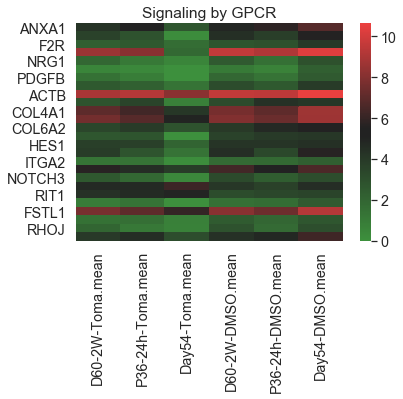

In [64]:
sns.heatmap(tgfdf, cmap=pal).set_title('Signaling by GPCR')
plt.savefig('./Signaling by GPCR.png', dpi=300, bbox_inches='tight')

In [65]:
tt = pd.DataFrame(tgfdf.iloc[:,0].reset_index().iloc[:,1])
tt = tt.rename(columns={'D60-2W-Toma.mean': 'value'})
tt2 = pd.DataFrame(tgfdf.iloc[:,1].reset_index().iloc[:,1])
tt2 = tt2.rename(columns={'P36-24h-Toma.mean': 'value'})
tt = tt.append(tt2)
tt2 = pd.DataFrame(tgfdf.iloc[:,2].reset_index().iloc[:,1])
tt2 = tt2.rename(columns={'Day54-Toma.mean': 'value'})
tt = tt.append(tt2)
tt['sample'] = 'Toma'

td = pd.DataFrame(tgfdf.iloc[:,3].reset_index().iloc[:,1])
td = td.rename(columns={'D60-2W-DMSO.mean': 'value'})
td2 = pd.DataFrame(tgfdf.iloc[:,4].reset_index().iloc[:,1])
td2 = td2.rename(columns={'P36-24h-DMSO.mean': 'value'})
td = td.append(td2)
td2 = pd.DataFrame(tgfdf.iloc[:,5].reset_index().iloc[:,1])
td2 = td2.rename(columns={'Day54-DMSO.mean': 'value'})
td = td.append(td2)
td['sample'] = 'DMSO'


tt = td.append(tt)
tt = tt.reset_index().iloc[:,1:]
tt['gene'] = 'unknown'


k=0
for i in range(0,6):
    for j in range(0,len(tgfdf.index)):
        tt.iloc[k,2] = tgfdf.index[j]
        k=k+1

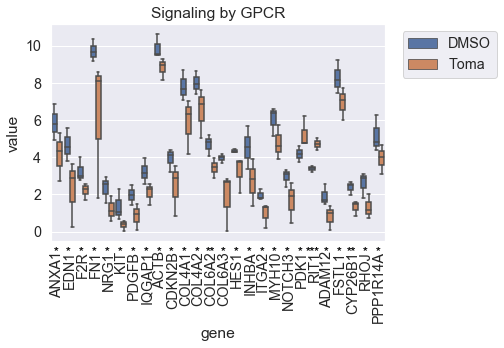

In [66]:
ax = sns.boxplot(data = tt, x = 'gene', y = 'value', hue = 'sample')
ax.set_title('Signaling by GPCR')
plt.xticks(rotation=90)

#add_stat_annotation(ax, data=tt, x='gene', y='value', hue='sample',
#                    box_pairs=[(("BDNF", "Toma"), ("BDNF", "DMSO")),
#                               (("COL4A1", "Toma"), ("COL4A1", "DMSO")),
#                               (("COL4A2", "Toma"), ("COL4A2", "DMSO")),
#                               (("COL6A2", "Toma"), ("COL6A2", "DMSO")),
#                               (("COL6A3", "Toma"), ("COL6A3", "DMSO")),
#                               (("EPHA2", "Toma"), ("EPHA2", "DMSO")),
#                               (("F2R", "Toma"), ("F2R", "DMSO")),
#                               (("FN1", "Toma"), ("FN1", "DMSO")),
#                               (("ITGA1", "Toma"), ("ITGA1", "DMSO")),
#                               (("ITGA2", "Toma"), ("ITGA2", "DMSO")),
#                               (("ITGA4", "Toma"), ("ITGA4", "DMSO")),
#                               (("KIT", "Toma"), ("KIT", "DMSO")),
#                               (("OSMR", "Toma"), ("OSMR", "DMSO")),
#                               (("PDGFB", "Toma"), ("PDGFB", "DMSO"))
#                                ],
#                    test='Wilcoxon', text_format='star', loc='inside', verbose=2)

medians = tt.groupby(['gene'])['value'].median()

for xtick in ax.get_xticks():
    if xtick == 20:
        ax.text(xtick-0.1,-1.2, '***', 
            horizontalalignment='center',size='large',color='black',weight='semibold')
    elif (xtick == 12 or xtick == 23):
        ax.text(xtick-0.1,-1.2, '**', 
            horizontalalignment='center',size='large',color='black',weight='semibold')
    else:
        ax.text(xtick-0.1,-1.2, '*', 
            horizontalalignment='center',size='large',color='black',weight='semibold')

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))

plt.savefig('./Signaling by GPCR_box.png', dpi=300, bbox_inches='tight')

---

Text(17, 13, 'Signaling by GPCR')

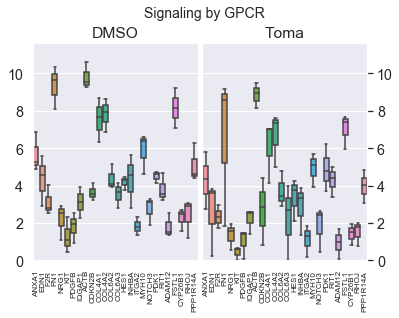

In [67]:
temp = tgfdf.T.iloc[[0,2,4],:]
temp2 = tgfdf.T.iloc[[1,3,5],:]

fig = plt.figure()
ax1 = fig.add_subplot(1,2,2)
f1 = sns.boxplot(data=temp)
f1.set_title('Toma')
plt.xticks(rotation=90, fontsize=8)
ax1.yaxis.tick_right()
plt.ylim([0,tgfdf.max().max()+1])

ax2 = fig.add_subplot(1,2,1)
f1 = sns.boxplot(data=temp2)
f1.set_title('DMSO')
plt.xticks(rotation=90, fontsize=8)
plt.ylim([0,tgfdf.max().max()+1])

fig.subplots_adjust(wspace=0.03)
plt.text(17, 13, r'Signaling by GPCR', fontsize=14)

#plt.savefig('./Signaling by GPCR_box.png', dpi=300, bbox_inches='tight')

In [68]:
tgfbdf_h = tgfbdf_h.dropna().drop_duplicates()

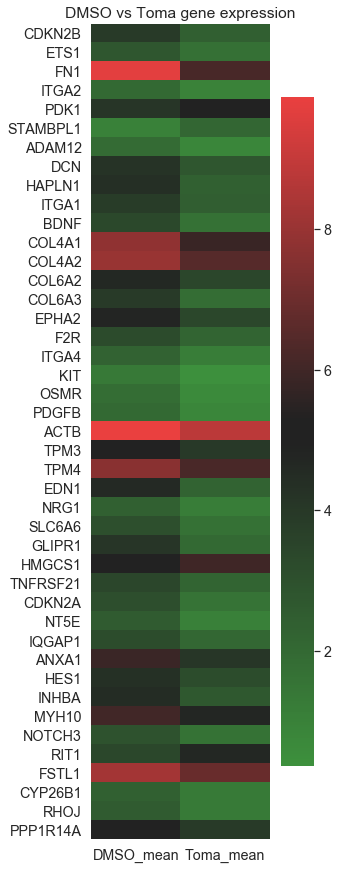

In [70]:
fig = plt.subplots(figsize = (4, 15))
sns.heatmap(tgfbdf_h, cmap=pal).set_title('DMSO vs Toma gene expression')
plt.savefig('./DMSO vs Toma gene expression.png', dpi=300, bbox_inches='tight')